## Problem 1: Linear Regression

In [4]:
import pandas as pd

In [5]:
data = pd.read_excel('compactiv.xlsx')

In [6]:
# Check variable types
variable_types = data.dtypes
print("Variable Types:")
print(variable_types)

Variable Types:
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object


In [7]:
# Check for null values
null_values = data.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [8]:
# Check total rows and columns
total_rows, total_columns = data.shape
print(f'Total Rows: {total_rows}')
print(f'Total Columns: {total_columns}')


Total Rows: 8192
Total Columns: 22


In [9]:
# Check data types
variable_types = data.dtypes
print("\nVariable Types:")
print(variable_types)


Variable Types:
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object


In [10]:
# Check for null values in each column
null_values = data.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [11]:
# Filter columns with null values
columns_with_null_values = null_values[null_values > 0]
print("\nColumns with Null Values:")
print(columns_with_null_values)


Columns with Null Values:
rchar    104
wchar     15
dtype: int64


In [12]:
# Count of object, integer, and float data types
object_columns = variable_types[variable_types == 'object']
int_columns = variable_types[variable_types == 'int64']
float_columns = variable_types[variable_types == 'float64']

In [13]:
print(f"\nNumber of Object Columns: {len(object_columns)}")
print(f"Number of Integer Columns: {len(int_columns)}")
print(f"Number of Float Columns: {len(float_columns)}")


Number of Object Columns: 1
Number of Integer Columns: 8
Number of Float Columns: 13


In [14]:
# Display the first 5 rows as a sample
sample_data = data.head()
print(sample_data)

   lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  10212

In [15]:
# Check variable types
variable_types = data.dtypes
print("Variable Types:")
print(variable_types)


Variable Types:
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
usr           int64
dtype: object


In [16]:
# Check for null values
null_values = data.isnull().sum()
print("\nNull Values:")
print(null_values)


Null Values:
lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


In [17]:
# Check variable types and non-null count
variable_info = data.agg(['count', 'dtype']).transpose()
variable_info.columns = ['Non-Null Count', 'Dtype']
variable_info.index.name = 'Column'

In [18]:
print(variable_info)

         Non-Null Count    Dtype
Column                          
lread              8192    int64
lwrite             8192    int64
scall              8192    int64
sread              8192    int64
swrite             8192    int64
fork               8192  float64
exec               8192  float64
rchar              8088  float64
wchar              8177  float64
pgout              8192  float64
ppgout             8192  float64
pgfree             8192  float64
pgscan             8192  float64
atch               8192  float64
pgin               8192  float64
ppgin              8192  float64
pflt               8192  float64
vflt               8192  float64
runqsz             8192   object
freemem            8192    int64
freeswap           8192    int64
usr                8192    int64


In [19]:
# Compute the 5-Point Summary for numerical columns
five_point_summary = data.describe()


In [20]:
# Remove 'pgscan' column if 75% of the data is 0
if 'pgscan' in data.columns:
    non_zero_count = data['pgscan'][data['pgscan'] != 0].count()
    total_count = data['pgscan'].count()
    if non_zero_count / total_count <= 0.25:
        data = data.drop(columns=['pgscan'])

In [24]:
# Display the 5-Point Summary and the updated DataFrame
print("5-Point Summary:")
print(five_point_summary)

5-Point Summary:
             lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317  ...   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     

In [22]:
# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data)


Updated DataFrame:
      lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgfree  atch   pgin  ppgin    pflt    vflt       

In [25]:
# Compute the 5-Point Summary for numerical columns
five_point_summary = data.describe()

In [26]:
# Remove 'pgscan' column if 75% of the data is 0
if 'pgscan' in data.columns:
    non_zero_count = data['pgscan'][data['pgscan'] != 0].count()
    total_count = data['pgscan'].count()
    if non_zero_count / total_count <= 0.25:
        data = data.drop(columns=['pgscan'])

In [27]:
# Display the 5-Point Summary and the updated DataFrame
print("5-Point Summary:")
print(five_point_summary)

5-Point Summary:
             lread       lwrite         scall        sread       swrite  \
count  8192.000000  8192.000000   8192.000000  8192.000000  8192.000000   
mean     19.559692    13.106201   2306.318237   210.479980   150.058228   
std      53.353799    29.891726   1633.617322   198.980146   160.478980   
min       0.000000     0.000000    109.000000     6.000000     7.000000   
25%       2.000000     0.000000   1012.000000    86.000000    63.000000   
50%       7.000000     1.000000   2051.500000   166.000000   117.000000   
75%      20.000000    10.000000   3317.250000   279.000000   185.000000   
max    1845.000000   575.000000  12493.000000  5318.000000  5456.000000   

              fork         exec         rchar         wchar        pgout  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000   
mean      1.884554     2.791998  1.973857e+05  9.590299e+04     2.285317   
std       2.479493     5.212456  2.398375e+05  1.408417e+05     5.307038   
min

In [28]:
# Display the updated DataFrame
print("\nUpdated DataFrame:")
print(data)


Updated DataFrame:
      lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
0         1       0   2147     79      68   0.2  0.20   40671.0  53995.0   
1         0       0    170     18      21   0.2  0.20     448.0   8385.0   
2        15       3   2162    159     119   2.0  2.40       NaN  31950.0   
3         0       0    160     12      16   0.2  0.20       NaN   8670.0   
4         5       1    330     39      38   0.4  0.40       NaN  12185.0   
...     ...     ...    ...    ...     ...   ...   ...       ...      ...   
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgfree  atch   pgin  ppgin    pflt    vflt       

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

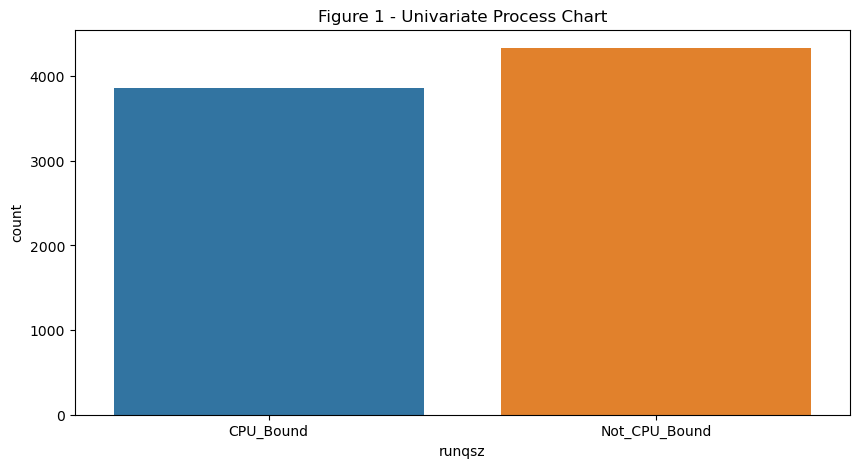

In [33]:
# Univariate Analysis
# Figure 1 - Univariate Process Chart
plt.figure(figsize=(10, 5))
sns.countplot(x='runqsz', data=data)
plt.title('Figure 1 - Univariate Process Chart')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_27724\1422094100.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['usr'])


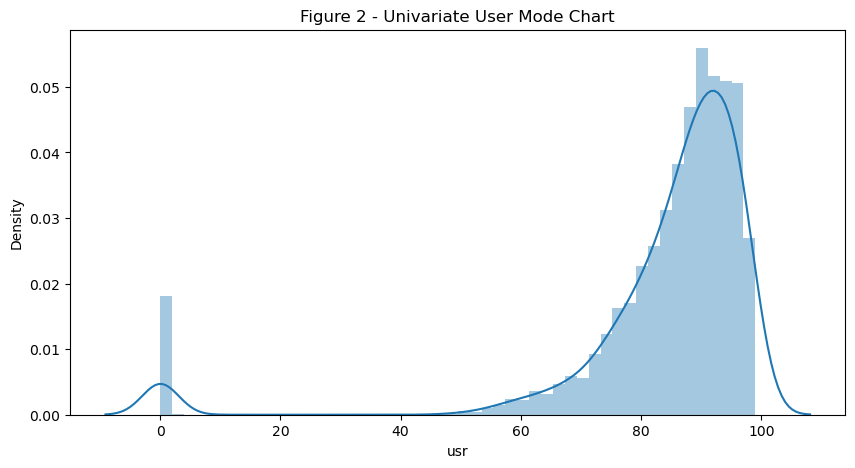

In [34]:
# Figure 2 - Univariate User Mode Chart
plt.figure(figsize=(10, 5))
sns.distplot(data['usr'])
plt.title('Figure 2 - Univariate User Mode Chart')
plt.show()


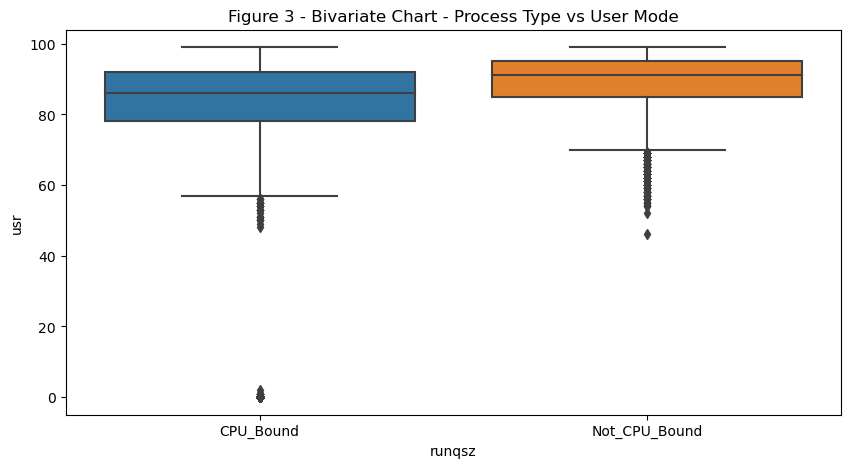

In [35]:
# Bivariate Analysis
# Figure 3 - Bivariate Chart - Process Type vs User Mode
plt.figure(figsize=(10, 5))
sns.boxplot(x='runqsz', y='usr', data=data)
plt.title('Figure 3 - Bivariate Chart - Process Type vs User Mode')
plt.show()

In [36]:
# Data Transformation
# Replace runqsz values
data['runqsz'] = data['runqsz'].replace({'CPU_Bound': 1, 'Not_CPU_Bound': 0})


In [37]:
# Verify the changes
print("Updated DataFrame:")
print(data.head())

Updated DataFrame:
   lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  freeswap  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40       1     4670   1730946   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83       0     7278   1869002   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20       0      702   1021237   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80       0     7248   1863704   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60       0      633   1760253   

   usr  
0   95  
1   97 

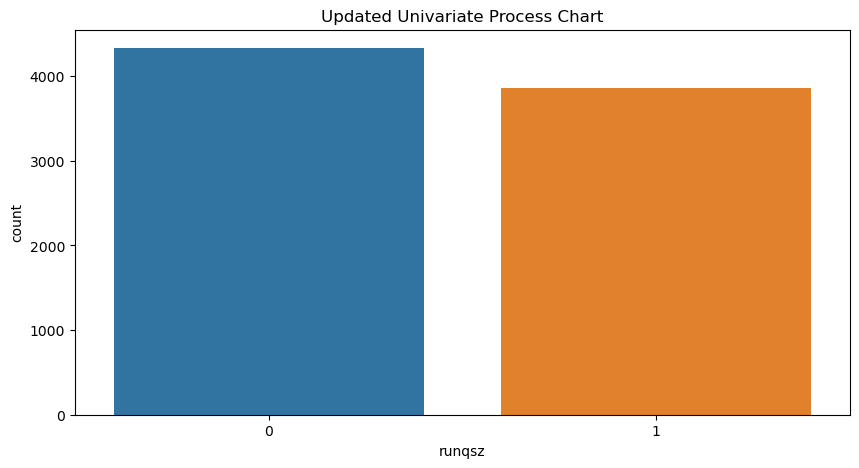

In [38]:
# Check the distribution of 'runqsz' after transformation
plt.figure(figsize=(10, 5))
sns.countplot(x='runqsz', data=data)
plt.title('Updated Univariate Process Chart')
plt.show()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [41]:
# Figure 1 - Univariate Process Chart (Histogram)
plt.figure(figsize=(8, 4))
plt.hist(data['process'], bins=10, color='skyblue')
plt.title('Univariate Process Chart')
plt.xlabel('Process')
plt.ylabel('Frequency')
plt.show()

KeyError: 'process'

<Figure size 800x400 with 0 Axes>

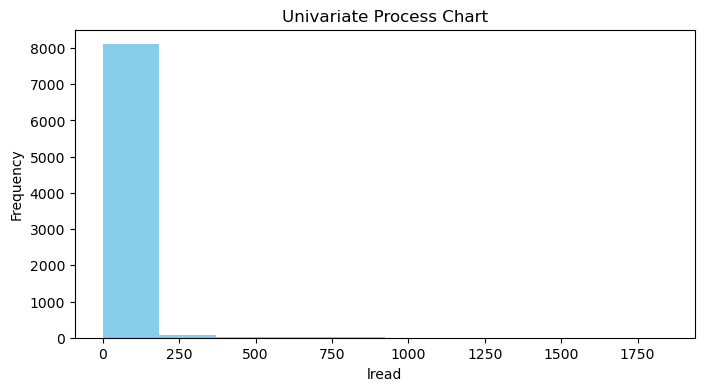

In [42]:
# Figure 1 - Univariate Process Chart (Histogram) for the 'lread' column
plt.figure(figsize=(8, 4))
plt.hist(data['lread'], bins=10, color='skyblue')
plt.title('Univariate Process Chart')
plt.xlabel('lread')
plt.ylabel('Frequency')
plt.show()

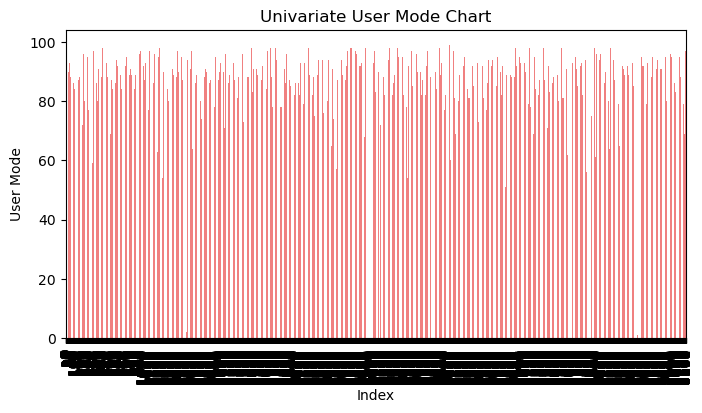

In [44]:
# Figure 2 - Univariate User mode Chart (Bar Chart)
plt.figure(figsize=(8, 4))
data['usr'].plot(kind='bar', color='lightcoral')
plt.title('Univariate User Mode Chart')
plt.xlabel('Index')
plt.ylabel('User Mode')
plt.show()

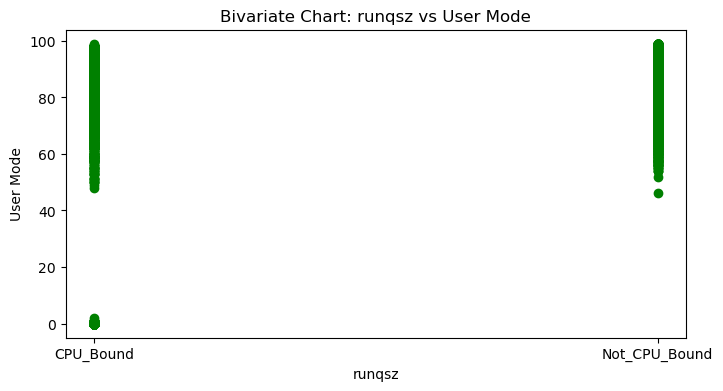

In [45]:
# Figure 3 - Bivariate Chart (Scatter Plot)
plt.figure(figsize=(8, 4))
plt.scatter(data['runqsz'], data['usr'], color='green')
plt.title('Bivariate Chart: runqsz vs User Mode')
plt.xlabel('runqsz')
plt.ylabel('User Mode')
plt.show()

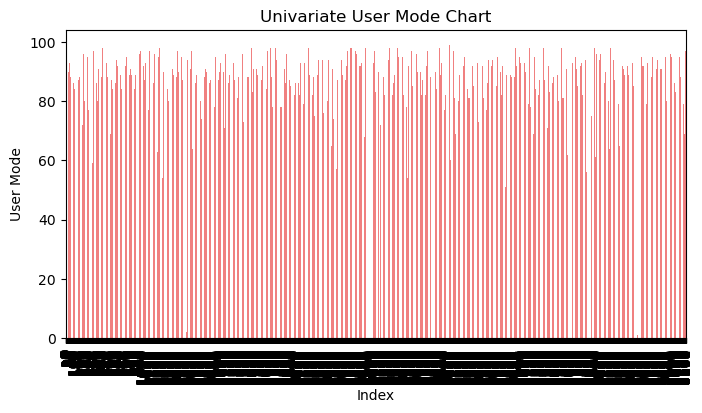

In [46]:
# Figure 2 - Univariate User mode Chart (Bar Chart)
plt.figure(figsize=(8, 4))
data['usr'].plot(kind='bar', color='lightcoral')
plt.title('Univariate User Mode Chart')
plt.xlabel('Index')
plt.ylabel('User Mode')
plt.show()

In [47]:
# Figure 3 - Bivariate Chart (Scatter Plot)
plt.figure(figsize=(8, 4))
plt.scatter(data['process'], data['usr'], color='green')
plt.title('Bivariate Chart: Process Type vs User Mode')
plt.xlabel('Process')
plt.ylabel('User Mode')
plt.show()


KeyError: 'process'

<Figure size 800x400 with 0 Axes>

In [48]:
# Create a box plot for all features except 'runqsz'
features = [col for col in data.columns if col != 'runqsz']


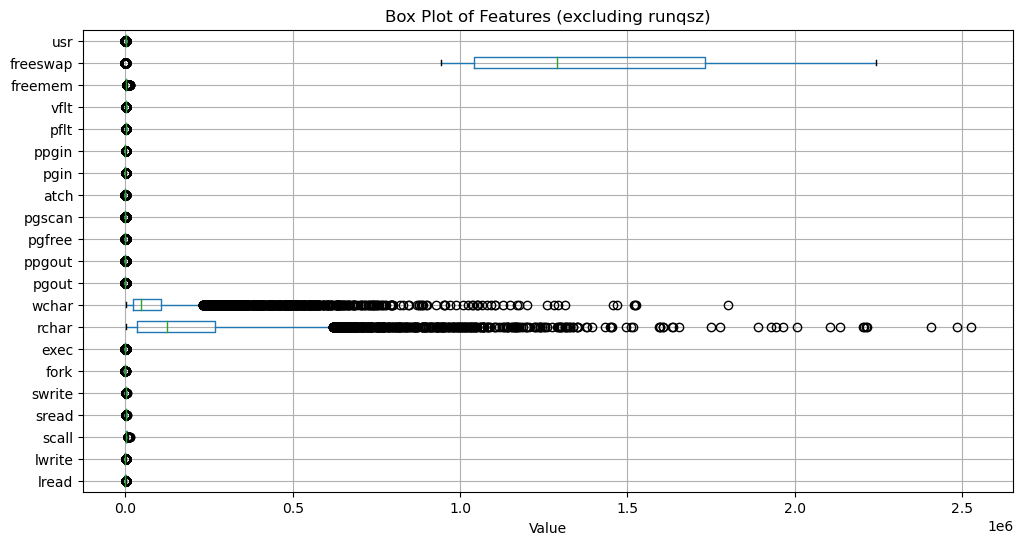

In [49]:
plt.figure(figsize=(12, 6))
data[features].boxplot(vert=False)
plt.title('Box Plot of Features (excluding runqsz)')
plt.xlabel('Value')
plt.show()

In [50]:
features = [col for col in data.columns if col != 'runqsz']

<Axes: >

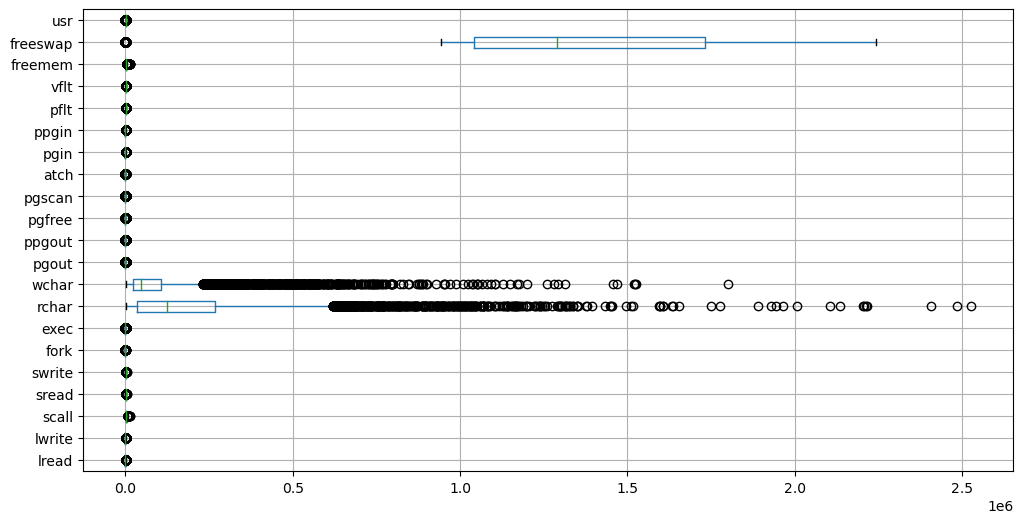

In [51]:
plt.figure(figsize=(12, 6))
data[features].boxplot(vert=False)

Text(0.5, 0, 'Value')

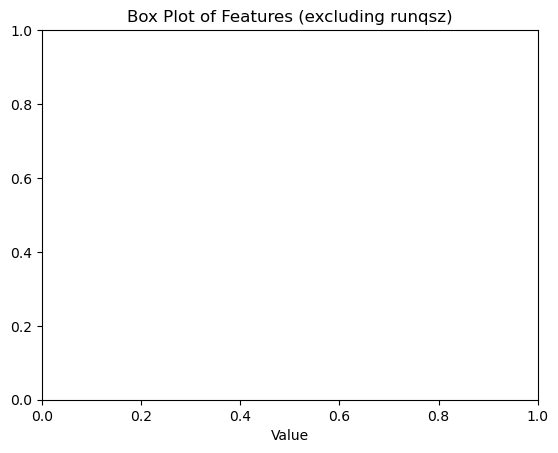

In [52]:
plt.title('Box Plot of Features (excluding runqsz)')
plt.xlabel('Value')

In [53]:
plt.show()

In [54]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [55]:
# List of numerical columns for which you want to create box plots
numerical_columns = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

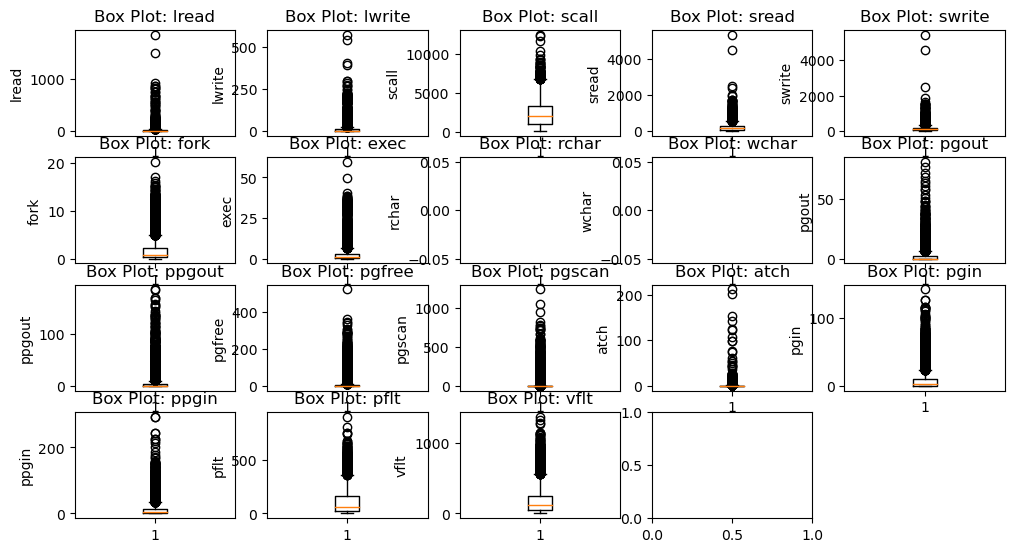

In [56]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(5, 5, numerical_columns.index(column) + 1)
    plt.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

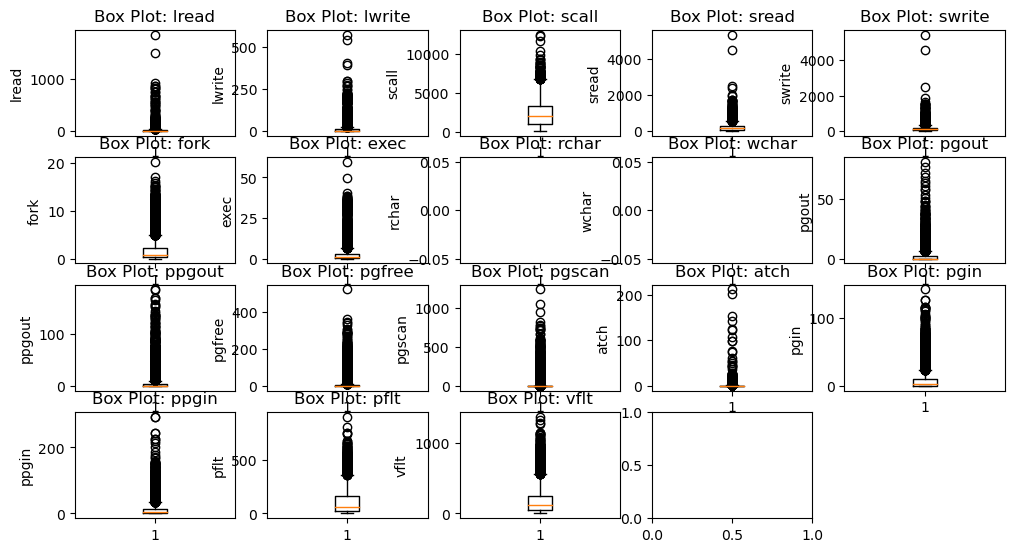

In [57]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(5, 5, numerical_columns.index(column) + 1)
    plt.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [58]:
# Get a list of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


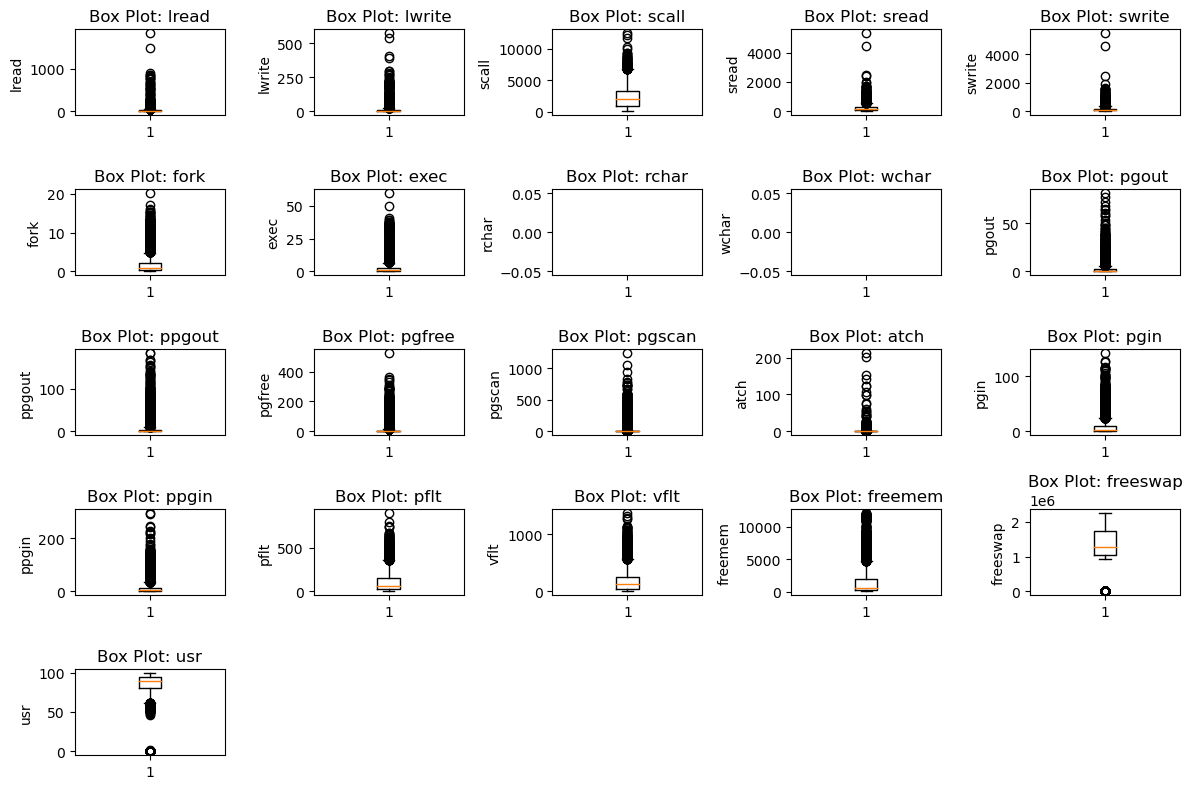

In [61]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(5, 5, list(numerical_columns).index(column) + 1)
    plt.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()

In [60]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [62]:
# Get a list of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


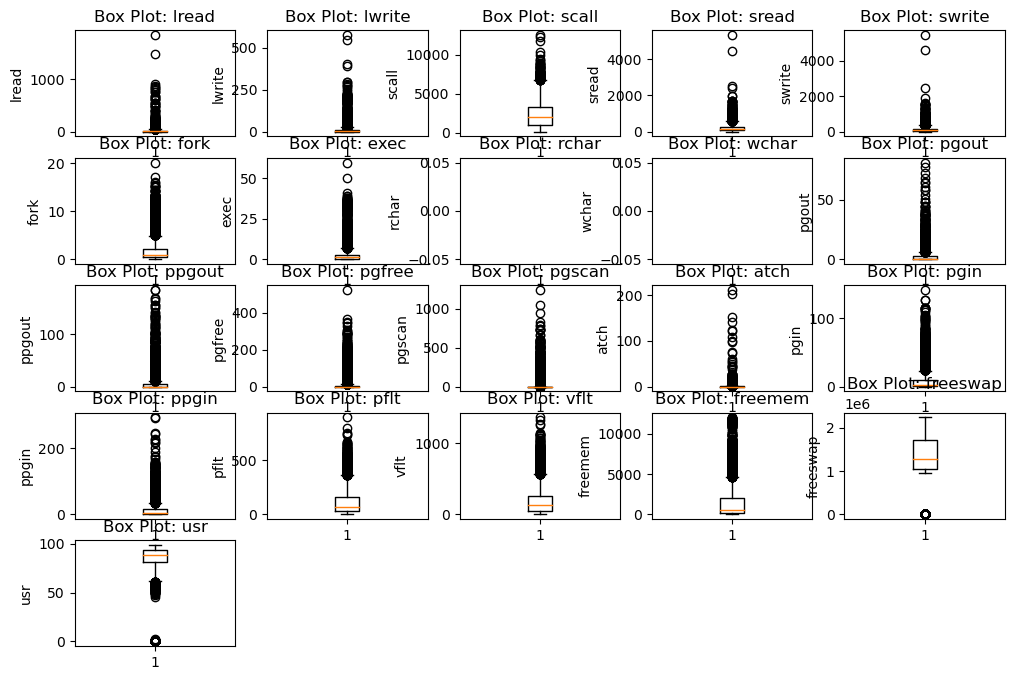

In [63]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(5, 5, list(numerical_columns).index(column) + 1)
    plt.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)

In [65]:
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

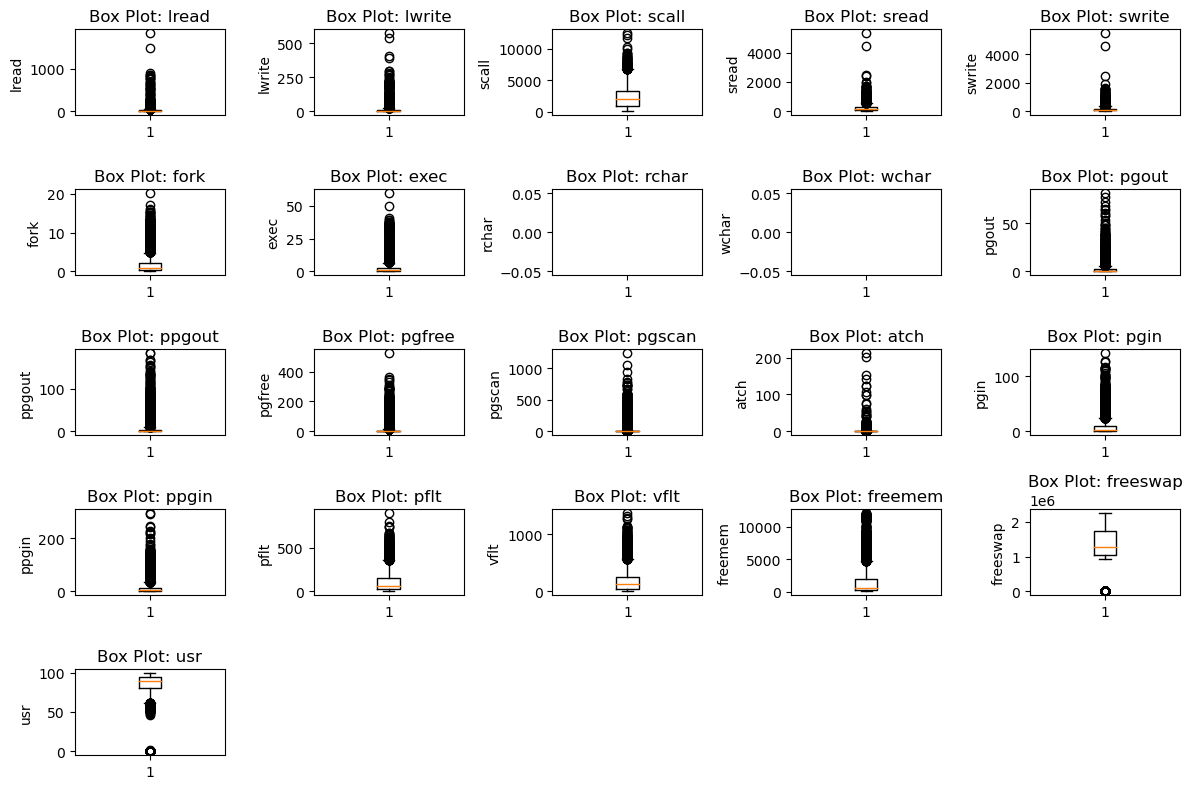

In [66]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(5, 5, list(numerical_columns).index(column) + 1)
    plt.boxplot(data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)
    plt.tight_layout()
plt.show()


In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [69]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_27724\2695943163.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


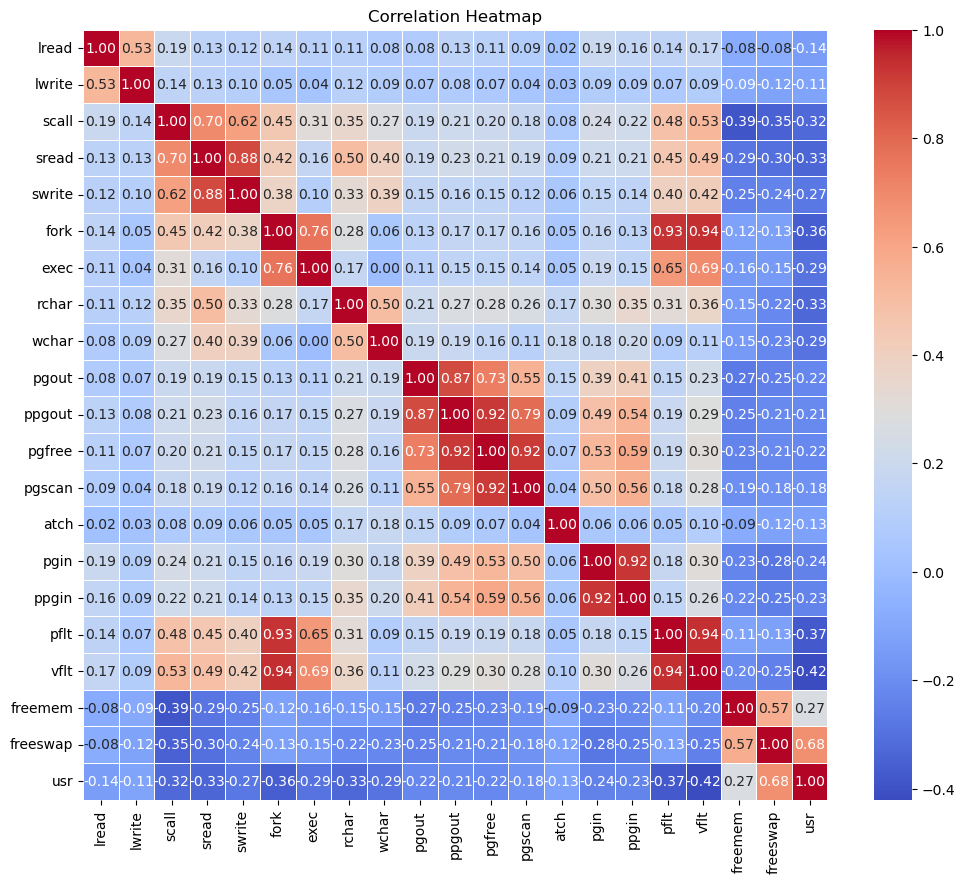

In [70]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Check for zero values in each column
zero_values = (data == 0).sum()

In [72]:
# Display columns with zero values
columns_with_zeros = zero_values[zero_values > 0]
print("Columns with Zero Values:")
print(columns_with_zeros)

Columns with Zero Values:
lread      675
lwrite    2684
fork        21
exec        21
pgout     4878
ppgout    4878
pgfree    4869
pgscan    6448
atch      4575
pgin      1220
ppgin     1220
pflt         3
usr        283
dtype: int64


In [73]:
# Check for zero values in each column and calculate the percentage
zero_values = (data == 0).sum()
total_values = len(data)
percentage_zeros = (zero_values / total_values) * 100

In [74]:
# Display columns with zero values and their percentage
columns_with_zeros = percentage_zeros[percentage_zeros > 0]
print("Columns with Zero Values and Their Percentage:")
print(columns_with_zeros)

Columns with Zero Values and Their Percentage:
lread      8.239746
lwrite    32.763672
fork       0.256348
exec       0.256348
pgout     59.545898
ppgout    59.545898
pgfree    59.436035
pgscan    78.710938
atch      55.847168
pgin      14.892578
ppgin     14.892578
pflt       0.036621
usr        3.454590
dtype: float64


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [77]:
# List of numerical columns for outlier check
numerical_columns = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap']


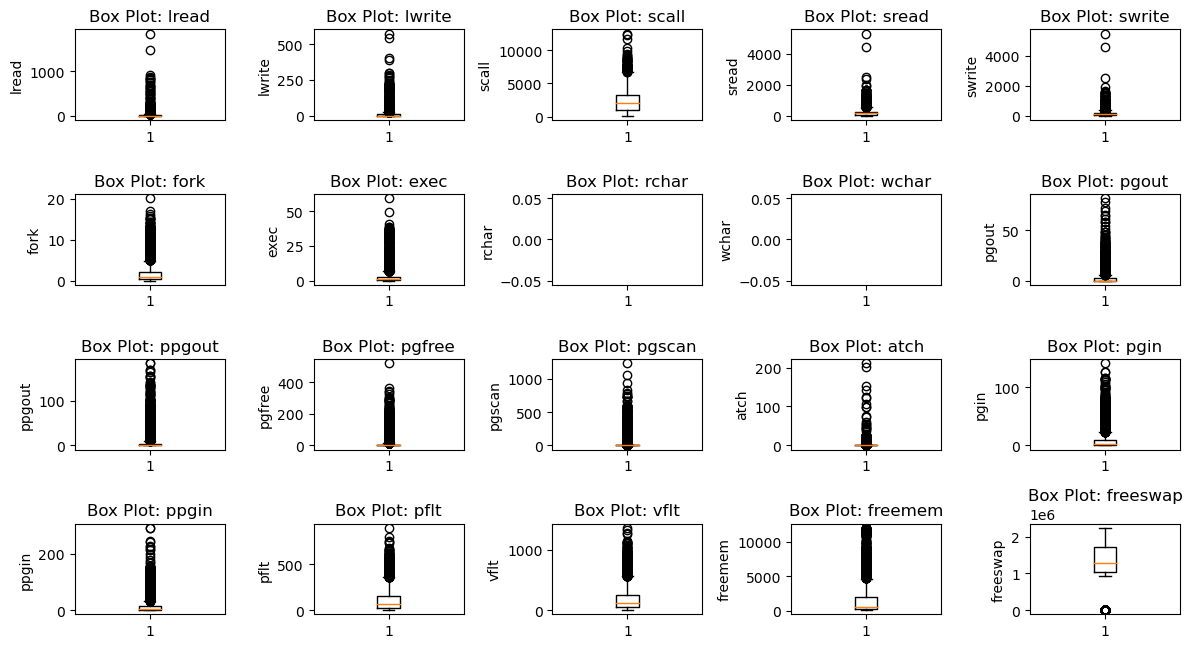

In [78]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    if column != 'runqsz':
        plt.subplot(5, 5, numerical_columns.index(column) + 1)
        plt.boxplot(data[column])
        plt.title(f'Box Plot: {column}')
        plt.ylabel(column)

plt.tight_layout()
plt.show()

In [79]:
import pandas as pd
import statsmodels.api as sm


In [80]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')


In [81]:
# Define the dependent variable (usr) and independent variables (features)
y = data['usr']
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']]


In [82]:
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)


In [83]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
dtype: object. The data was
0       95
1       97
2       87
3       98
4       90
        ..
8187    80
8188    90
8189    87
8190    83
8191    94
Name: usr, Length: 8192, dtype: int64
and
       const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
0       1.0      1       0   2147     79      68   0.2  0.20   40671.0   
1       1.0      0       0    170     18      21   0.2  0.20     448.0   
2       1.0     15       3   2162    159     119   2.0  2.40       NaN   
3       1.0      0       0    160     12      16   0.2  0.20       NaN   
4       1.0      5       1    330     39      38   0.4  0.40       NaN   
...     ...    ...     ...    ...    ...     ...   ...   ...       ...   
8187    1.0     16      12   3009    360     244   1.6  5.81  405250.0   
8188    1.0      4       0   1596    170     146   2.4  1.80   89489.0   
8189    1.0     16       5   3116    289     190   0.6  0.60  325948.0   
8190    1.0     32      45   5180    254     179   1.2  1.20   62571.0   
8191    1.0      2       0    985     55      46   1.6  4.80  111111.0   

        wchar  ...  ppgout  pgfree  atch   pgin  ppgin    pflt    vflt  \
0     53995.0  ...    0.00    0.00   0.0   1.60   2.60   16.00   26.40   
1      8385.0  ...    0.00    0.00   0.0   0.00   0.00   15.63   16.83   
2     31950.0  ...    0.00    0.00   1.2   6.00   9.40  150.20  220.20   
3      8670.0  ...    0.00    0.00   0.0   0.20   0.20   15.60   16.80   
4     12185.0  ...    0.00    0.00   0.0   1.00   1.20   37.80   47.60   
...       ...  ...     ...     ...   ...    ...    ...     ...     ...   
8187  85282.0  ...   20.64   43.69   0.6  35.87  47.90  139.28  270.74   
8188  41764.0  ...    4.80    4.80   0.8   3.80   4.40  122.40  212.60   
8189  52640.0  ...    0.60    0.60   0.4  28.40  45.20   60.20  219.80   
8190  29505.0  ...    1.60   13.03   0.4  23.05  24.25   93.19  202.81   
8191  22256.0  ...    0.00    0.00   0.2   3.40   6.20   91.80  110.00   

             runqsz freemem  freeswap  
0         CPU_Bound    4670   1730946  
1     Not_CPU_Bound    7278   1869002  
2     Not_CPU_Bound     702   1021237  
3     Not_CPU_Bound    7248   1863704  
4     Not_CPU_Bound     633   1760253  
...             ...     ...       ...  
8187      CPU_Bound     387    986647  
8188  Not_CPU_Bound     263   1055742  
8189  Not_CPU_Bound     400    969106  
8190      CPU_Bound     141   1022458  
8191      CPU_Bound     659   1756514  

[8192 rows x 21 columns]
before. After,
[95 97 87 ... 87 83 94]
[[1.0 1 0 ... 'CPU_Bound' 4670 1730946]
 [1.0 0 0 ... 'Not_CPU_Bound' 7278 1869002]
 [1.0 15 3 ... 'Not_CPU_Bound' 702 1021237]
 ...
 [1.0 16 5 ... 'Not_CPU_Bound' 400 969106]
 [1.0 32 45 ... 'CPU_Bound' 141 1022458]
 [1.0 2 0 ... 'CPU_Bound' 659 1756514]].

In [84]:
# Print the regression summary
print(model.summary())

NameError: name 'model' is not defined

In [85]:
# Convert 'runqsz' to binary values (1 for CPU_Bound and 0 for Not_CPU_Bound)
data['runqsz'] = data['runqsz'].apply(lambda x: 1 if x == 'CPU_Bound' else 0)


In [86]:
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

In [87]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
dtype: object. The data was
0       95
1       97
2       87
3       98
4       90
        ..
8187    80
8188    90
8189    87
8190    83
8191    94
Name: usr, Length: 8192, dtype: int64
and
       const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
0       1.0      1       0   2147     79      68   0.2  0.20   40671.0   
1       1.0      0       0    170     18      21   0.2  0.20     448.0   
2       1.0     15       3   2162    159     119   2.0  2.40       NaN   
3       1.0      0       0    160     12      16   0.2  0.20       NaN   
4       1.0      5       1    330     39      38   0.4  0.40       NaN   
...     ...    ...     ...    ...    ...     ...   ...   ...       ...   
8187    1.0     16      12   3009    360     244   1.6  5.81  405250.0   
8188    1.0      4       0   1596    170     146   2.4  1.80   89489.0   
8189    1.0     16       5   3116    289     190   0.6  0.60  325948.0   
8190    1.0     32      45   5180    254     179   1.2  1.20   62571.0   
8191    1.0      2       0    985     55      46   1.6  4.80  111111.0   

        wchar  ...  ppgout  pgfree  atch   pgin  ppgin    pflt    vflt  \
0     53995.0  ...    0.00    0.00   0.0   1.60   2.60   16.00   26.40   
1      8385.0  ...    0.00    0.00   0.0   0.00   0.00   15.63   16.83   
2     31950.0  ...    0.00    0.00   1.2   6.00   9.40  150.20  220.20   
3      8670.0  ...    0.00    0.00   0.0   0.20   0.20   15.60   16.80   
4     12185.0  ...    0.00    0.00   0.0   1.00   1.20   37.80   47.60   
...       ...  ...     ...     ...   ...    ...    ...     ...     ...   
8187  85282.0  ...   20.64   43.69   0.6  35.87  47.90  139.28  270.74   
8188  41764.0  ...    4.80    4.80   0.8   3.80   4.40  122.40  212.60   
8189  52640.0  ...    0.60    0.60   0.4  28.40  45.20   60.20  219.80   
8190  29505.0  ...    1.60   13.03   0.4  23.05  24.25   93.19  202.81   
8191  22256.0  ...    0.00    0.00   0.2   3.40   6.20   91.80  110.00   

             runqsz freemem  freeswap  
0         CPU_Bound    4670   1730946  
1     Not_CPU_Bound    7278   1869002  
2     Not_CPU_Bound     702   1021237  
3     Not_CPU_Bound    7248   1863704  
4     Not_CPU_Bound     633   1760253  
...             ...     ...       ...  
8187      CPU_Bound     387    986647  
8188  Not_CPU_Bound     263   1055742  
8189  Not_CPU_Bound     400    969106  
8190      CPU_Bound     141   1022458  
8191      CPU_Bound     659   1756514  

[8192 rows x 21 columns]
before. After,
[95 97 87 ... 87 83 94]
[[1.0 1 0 ... 'CPU_Bound' 4670 1730946]
 [1.0 0 0 ... 'Not_CPU_Bound' 7278 1869002]
 [1.0 15 3 ... 'Not_CPU_Bound' 702 1021237]
 ...
 [1.0 16 5 ... 'Not_CPU_Bound' 400 969106]
 [1.0 32 45 ... 'CPU_Bound' 141 1022458]
 [1.0 2 0 ... 'CPU_Bound' 659 1756514]].

In [96]:
import statsmodels.api as sm
import pandas as pd


In [97]:
# Assuming you have a DataFrame named df with your data
# Make sure to replace 'target_column' with the actual column you want to predict
X = df.drop('target_column', axis=1)
y = df['target_column']
# Define the dependent variable (usr) and independent variables (features)
y = data['usr']
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']]


NameError: name 'df' is not defined

In [101]:
# Define the dependent variable (usr) and independent variables (features)
y = data.drop('usr', axis=1)
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap']]


In [102]:
# Add a constant to the independent variables (intercept term)
X = sm.add_constant(X)


In [107]:
import statsmodels.api as sm


In [108]:
# Define the dependent variable (usr) and independent variables (features)
y = data.drop('usr', axis=1)
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap']]


In [110]:
data.dropna(subset=['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt'], inplace=True)

In [113]:
import statsmodels.api as sm
import pandas as pd


In [115]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [116]:
# Define the dependent variable (usr) and independent variables (features)
y = data['usr']
X = data[['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']]


In [117]:
# Fit the linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
dtype: object. The data was
0       95
1       97
2       87
3       98
4       90
        ..
8187    80
8188    90
8189    87
8190    83
8191    94
Name: usr, Length: 8192, dtype: int64
and
       const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
0       1.0      1       0   2147     79      68   0.2  0.20   40671.0   
1       1.0      0       0    170     18      21   0.2  0.20     448.0   
2       1.0     15       3   2162    159     119   2.0  2.40       NaN   
3       1.0      0       0    160     12      16   0.2  0.20       NaN   
4       1.0      5       1    330     39      38   0.4  0.40       NaN   
...     ...    ...     ...    ...    ...     ...   ...   ...       ...   
8187    1.0     16      12   3009    360     244   1.6  5.81  405250.0   
8188    1.0      4       0   1596    170     146   2.4  1.80   89489.0   
8189    1.0     16       5   3116    289     190   0.6  0.60  325948.0   
8190    1.0     32      45   5180    254     179   1.2  1.20   62571.0   
8191    1.0      2       0    985     55      46   1.6  4.80  111111.0   

        wchar  ...  ppgout  pgfree  atch   pgin  ppgin    pflt    vflt  \
0     53995.0  ...    0.00    0.00   0.0   1.60   2.60   16.00   26.40   
1      8385.0  ...    0.00    0.00   0.0   0.00   0.00   15.63   16.83   
2     31950.0  ...    0.00    0.00   1.2   6.00   9.40  150.20  220.20   
3      8670.0  ...    0.00    0.00   0.0   0.20   0.20   15.60   16.80   
4     12185.0  ...    0.00    0.00   0.0   1.00   1.20   37.80   47.60   
...       ...  ...     ...     ...   ...    ...    ...     ...     ...   
8187  85282.0  ...   20.64   43.69   0.6  35.87  47.90  139.28  270.74   
8188  41764.0  ...    4.80    4.80   0.8   3.80   4.40  122.40  212.60   
8189  52640.0  ...    0.60    0.60   0.4  28.40  45.20   60.20  219.80   
8190  29505.0  ...    1.60   13.03   0.4  23.05  24.25   93.19  202.81   
8191  22256.0  ...    0.00    0.00   0.2   3.40   6.20   91.80  110.00   

             runqsz freemem  freeswap  
0         CPU_Bound    4670   1730946  
1     Not_CPU_Bound    7278   1869002  
2     Not_CPU_Bound     702   1021237  
3     Not_CPU_Bound    7248   1863704  
4     Not_CPU_Bound     633   1760253  
...             ...     ...       ...  
8187      CPU_Bound     387    986647  
8188  Not_CPU_Bound     263   1055742  
8189  Not_CPU_Bound     400    969106  
8190      CPU_Bound     141   1022458  
8191      CPU_Bound     659   1756514  

[8192 rows x 21 columns]
before. After,
[95 97 87 ... 87 83 94]
[[1.0 1 0 ... 'CPU_Bound' 4670 1730946]
 [1.0 0 0 ... 'Not_CPU_Bound' 7278 1869002]
 [1.0 15 3 ... 'Not_CPU_Bound' 702 1021237]
 ...
 [1.0 16 5 ... 'Not_CPU_Bound' 400 969106]
 [1.0 32 45 ... 'CPU_Bound' 141 1022458]
 [1.0 2 0 ... 'CPU_Bound' 659 1756514]].

In [166]:
# Show the plot
plt.show()

In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [196]:
# Load the dataset
data = pd.read_excel('compactiv.xlsx')

In [197]:
# Select the features of interest
features = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'runqsz', 'freemem', 'freeswap']


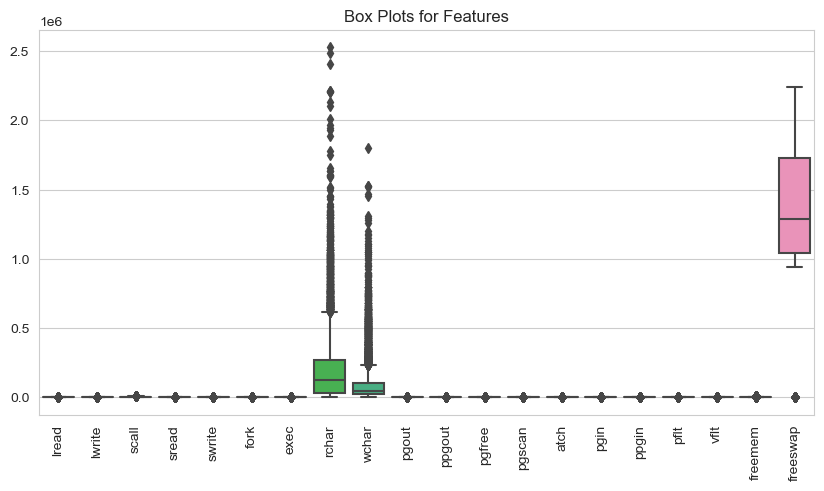

In [202]:
# Create a box plot for each feature
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[features])
plt.title("Box Plots for Features")
plt.xticks(rotation=90)
plt.show()

In [199]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


C:\Users\HP\AppData\Local\Temp\ipykernel_27724\1750584959.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data[features].quantile(0.25)
C:\Users\HP\AppData\Local\Temp\ipykernel_27724\1750584959.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data[features].quantile(0.75)


In [200]:
# Filter the data to remove outliers
data_no_outliers = data[~((data[features] < lower_bound) | (data[features] > upper_bound))]


C:\Users\HP\AppData\Local\Temp\ipykernel_27724\514485683.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outliers = data[~((data[features] < lower_bound) | (data[features] > upper_bound))]
C:\Users\HP\AppData\Local\Temp\ipykernel_27724\514485683.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_no_outliers = data[~((data[features] < lower_bound) | (data[features] > upper_bound))]


In [203]:
import matplotlib.pyplot as plt

In [204]:
# Select the numerical columns, excluding 'runqsz'
numerical_columns = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap']


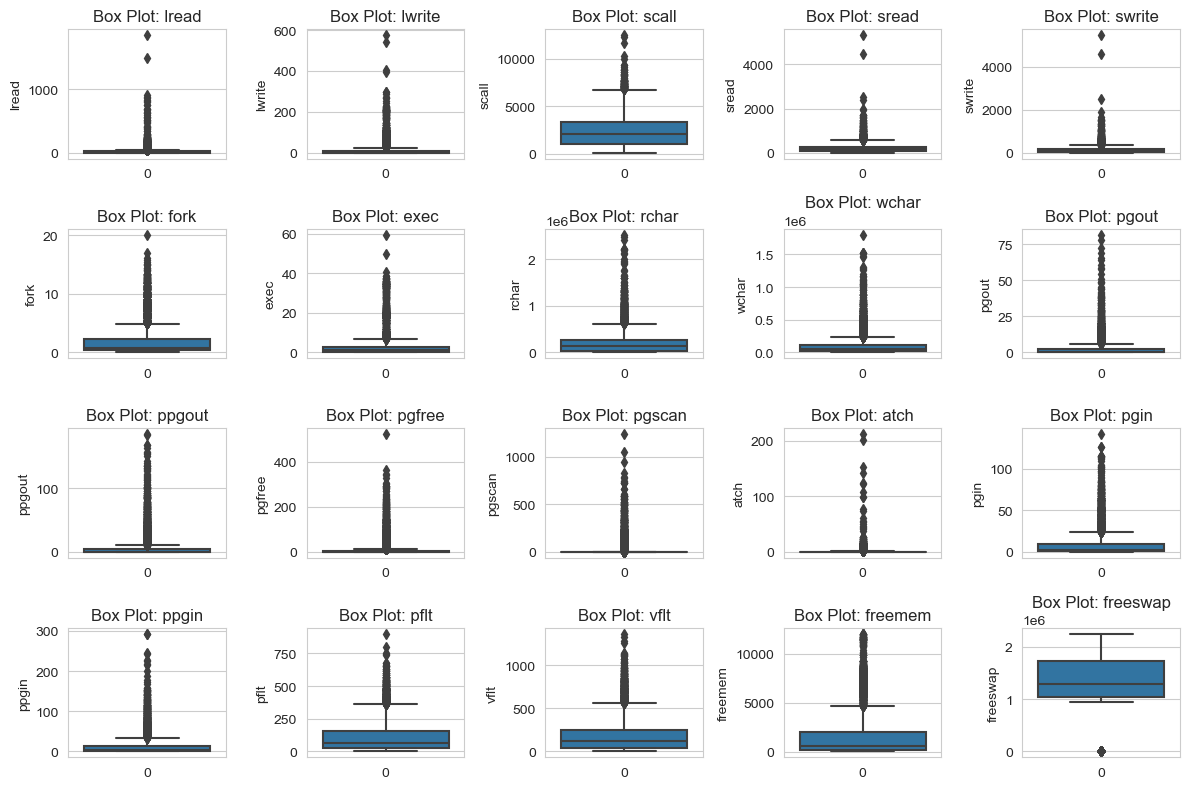

In [205]:
# Create individual box plots for each numerical column
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    plt.subplot(4, 5, numerical_columns.index(column) + 1)
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot: {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [233]:
# Step 1: Load the dataset
data = pd.read_excel('compactiv.xlsx')


In [234]:
# Step 2: Set 'usr' as the dependent variable (y) and all other columns as independent variables (X)
y = data['usr']
X = data.drop(['usr'], axis=1)

In [235]:
# Step 3: Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [236]:
# Step 4: Display the first 5 rows of X_train and X_test
print("First 5 rows of X_train:")
print(X_train.head(5))

First 5 rows of X_train:
      lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
1310     26      36   5731    312     224  0.80  0.80  155004.0  264757.0   
7365     15       3   1203     61      34  1.60  1.80  163076.0   33674.0   
2284     39      16   5213    754     767  6.99  4.99  435848.0  314796.0   
7076      2       0   2585    203     145  0.60  0.60  329604.0  126738.0   
3114      2       1   1827     65      88  0.40  0.20    4487.0    8828.0   

      pgout  ...  pgfree  pgscan  atch   pgin  ppgin   pflt    vflt  \
1310   0.00  ...    0.00    0.00  3.20   0.20   0.20   48.8  134.00   
7365   0.00  ...    0.00    0.00  0.00   0.00   0.00  127.8  199.40   
2284   6.19  ...   10.18    5.19  5.39  15.77  17.56  348.1  617.17   
7076   1.00  ...    1.00    0.00  0.80  29.46  30.46   49.9  194.39   
3114   0.00  ...    0.00    0.00  0.00   0.20   0.20   17.4   17.00   

             runqsz freemem  freeswap  
1310      CPU_Bound     249   1383946  
7365 

In [239]:
print("\nFirst 5 rows of X_test:")
print(X_test.head(5))


First 5 rows of X_test:
      lread  lwrite  scall  sread  swrite  fork   exec      rchar     wchar  \
5670     14       7   1495    197     169  0.80   1.00    10304.0   24435.0   
5369     10       8   3158    324     172  0.60   2.20  1037534.0  884253.0   
2111      2       0    813    117     113  1.80   0.60    59903.0   24550.0   
6659     48      68   3283    134     125  0.40   0.40    33832.0   23626.0   
5227     12       2   2357    113      96  6.99  20.16    55137.0   36291.0   

      pgout  ...  pgfree  pgscan  atch   pgin  ppgin    pflt    vflt  \
5670   7.98  ...   24.75   38.52   1.0   2.00   2.00   63.07  106.79   
5369   0.00  ...    0.00    0.00   0.0  26.00  45.80   46.00   79.20   
2111   0.60  ...    7.20   14.00   0.0   0.00   0.00   96.00  135.60   
6659   4.20  ...    9.00    0.00   0.6   1.80   2.20   36.40   56.20   
5227   0.00  ...    0.00    0.00   0.0   8.38  12.18  231.14  423.35   

             runqsz freemem  freeswap  
5670      CPU_Bound     186

In [240]:
# Step 5: Display the total number of columns and rows for X_train and X_test
num_columns_X_train = X_train.shape[1]
num_rows_X_train = X_train.shape[0]
num_columns_X_test = X_test.shape[1]
num_rows_X_test = X_test.shape[0]

In [241]:
print(f"\nNumber of columns in X_train: {num_columns_X_train}")
print(f"Number of rows in X_train: {num_rows_X_train}")
print(f"Number of columns in X_test: {num_columns_X_test}")
print(f"Number of rows in X_test: {num_rows_X_test}")


Number of columns in X_train: 21
Number of rows in X_train: 5734
Number of columns in X_test: 21
Number of rows in X_test: 2458


In [243]:
# Step 3: Split the data into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [244]:
# Step 4: Display the first 5 rows of X_train and X_test in a tabular format
headers = X_train.columns.tolist()
table_X_train = X_train.head(5).to_numpy()
table_X_test = X_test.head(5).to_numpy()

In [249]:
import pandas as pd
import statsmodels.api as sm


In [250]:
# Load your dataset
data = pd.read_excel('compactiv.xlsx')


In [251]:
# Set 'usr' as the dependent variable (y) and all other columns as independent variables (X)
y = data['usr']
X = data.drop(['usr'], axis=1)


In [252]:
# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)


In [253]:
# Fit the OLS model
model = sm.OLS(y, X).fit()


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const       float64
lread         int64
lwrite        int64
scall         int64
sread         int64
swrite        int64
fork        float64
exec        float64
rchar       float64
wchar       float64
pgout       float64
ppgout      float64
pgfree      float64
pgscan      float64
atch        float64
pgin        float64
ppgin       float64
pflt        float64
vflt        float64
runqsz       object
freemem       int64
freeswap      int64
dtype: object. The data was
0       95
1       97
2       87
3       98
4       90
        ..
8187    80
8188    90
8189    87
8190    83
8191    94
Name: usr, Length: 8192, dtype: int64
and
       const  lread  lwrite  scall  sread  swrite  fork  exec     rchar  \
0       1.0      1       0   2147     79      68   0.2  0.20   40671.0   
1       1.0      0       0    170     18      21   0.2  0.20     448.0   
2       1.0     15       3   2162    159     119   2.0  2.40       NaN   
3       1.0      0       0    160     12      16   0.2  0.20       NaN   
4       1.0      5       1    330     39      38   0.4  0.40       NaN   
...     ...    ...     ...    ...    ...     ...   ...   ...       ...   
8187    1.0     16      12   3009    360     244   1.6  5.81  405250.0   
8188    1.0      4       0   1596    170     146   2.4  1.80   89489.0   
8189    1.0     16       5   3116    289     190   0.6  0.60  325948.0   
8190    1.0     32      45   5180    254     179   1.2  1.20   62571.0   
8191    1.0      2       0    985     55      46   1.6  4.80  111111.0   

        wchar  ...  pgfree  pgscan  atch   pgin  ppgin    pflt    vflt  \
0     53995.0  ...    0.00    0.00   0.0   1.60   2.60   16.00   26.40   
1      8385.0  ...    0.00    0.00   0.0   0.00   0.00   15.63   16.83   
2     31950.0  ...    0.00    0.00   1.2   6.00   9.40  150.20  220.20   
3      8670.0  ...    0.00    0.00   0.0   0.20   0.20   15.60   16.80   
4     12185.0  ...    0.00    0.00   0.0   1.00   1.20   37.80   47.60   
...       ...  ...     ...     ...   ...    ...    ...     ...     ...   
8187  85282.0  ...   43.69   55.11   0.6  35.87  47.90  139.28  270.74   
8188  41764.0  ...    4.80    0.20   0.8   3.80   4.40  122.40  212.60   
8189  52640.0  ...    0.60    0.00   0.4  28.40  45.20   60.20  219.80   
8190  29505.0  ...   13.03   18.04   0.4  23.05  24.25   93.19  202.81   
8191  22256.0  ...    0.00    0.00   0.2   3.40   6.20   91.80  110.00   

             runqsz  freemem freeswap  
0         CPU_Bound     4670  1730946  
1     Not_CPU_Bound     7278  1869002  
2     Not_CPU_Bound      702  1021237  
3     Not_CPU_Bound     7248  1863704  
4     Not_CPU_Bound      633  1760253  
...             ...      ...      ...  
8187      CPU_Bound      387   986647  
8188  Not_CPU_Bound      263  1055742  
8189  Not_CPU_Bound      400   969106  
8190      CPU_Bound      141  1022458  
8191      CPU_Bound      659  1756514  

[8192 rows x 22 columns]
before. After,
[95 97 87 ... 87 83 94]
[[1.0 1 0 ... 'CPU_Bound' 4670 1730946]
 [1.0 0 0 ... 'Not_CPU_Bound' 7278 1869002]
 [1.0 15 3 ... 'Not_CPU_Bound' 702 1021237]
 ...
 [1.0 16 5 ... 'Not_CPU_Bound' 400 969106]
 [1.0 32 45 ... 'CPU_Bound' 141 1022458]
 [1.0 2 0 ... 'CPU_Bound' 659 1756514]].

In [254]:
# Print the summary of the regression results
print(model.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [258]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [259]:
# Load your dataset
data = pd.read_excel('compactiv.xlsx')


In [260]:
# Set 'usr' as the dependent variable (y) and all other columns as independent variables (X)
y = data['usr']
X = data.drop(['usr'], axis=1)


In [261]:
# Calculate VIF for each independent variable
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


C:\Users\HP\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [314]:
# Display the VIF values
print(vif)

    Variable
0      lread
1     lwrite
2      scall
3      sread
4     swrite
5       fork
6       exec
7      rchar
8      wchar
9      pgout
10    ppgout
11    pgfree
12    pgscan
13      atch
14      pgin
15     ppgin
16      pflt
17      vflt
18    runqsz
19   freemem
20  freeswap


In [349]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
!pip install scikit-learn

In [350]:
# Read the data
data = pd.read_excel('compactiv.xlsx')

In [351]:
# Select numerical columns and exclude 'runqsz'
numerical_columns = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar',
                    'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt',
                    'freemem', 'freeswap', 'usr']


In [352]:
# Subsetting the data to include only numerical columns
data = data[numerical_columns]


In [353]:
# Remove 'usr' from numerical columns to isolate features
features = [col for col in numerical_columns if col != 'usr']


In [354]:
# Create a list of different feature combinations
feature_combinations = [features[:i] for i in range(1, len(features))]


In [355]:
# Model fitting and evaluation for each feature combination
for features in feature_combinations:
    X = data[features]
    y = data['usr']


In [356]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [357]:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  

In [358]:
 # Model initialization
model = LinearRegression()


In [375]:
# Subsetting the data to include only numerical columns
data = data[numerical_columns]


In [376]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [377]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [379]:
# Subsetting data with selected features and target
X = data[features]
y = data[target]


In [380]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [381]:
# Predicted values
predicted_values = model.predict(X)

In [382]:
# Residuals
residuals = y - predicted_values

In [383]:
# Create a DataFrame containing actual, predicted, and residual values
results = pd.DataFrame({'Actual': y, 'Predicted': predicted_values, 'Residuals': residuals})
print(results)

      Actual  Predicted  Residuals
0         95  85.198668   9.801332
1         97  92.035939   4.964061
2         87  84.770611   2.229389
3         98  92.070409   5.929591
4         90  91.351435  -1.351435
...      ...        ...        ...
8187      80  81.649279  -1.649279
8188      90  87.030095   2.969905
8189      87  81.419780   5.580220
8190      83  73.147215   9.852785
8191      94  89.181427   4.818573

[8192 rows x 3 columns]


In [384]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [385]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [387]:
# Subsetting data with selected features and target
X = data[features]
y = data[target]

In [388]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [389]:
# Predicted values
predicted_values = model.predict(X)

In [390]:
# Residuals
residuals = y - predicted_values

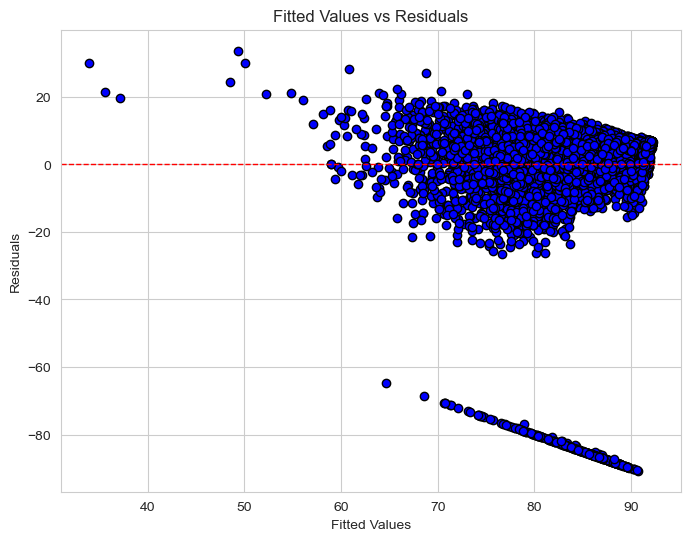

In [391]:
# Create a plot for fitted values against residuals
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, c='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0 for reference
plt.title('Fitted Values vs Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [392]:
import pandas as pd
import seaborn as sns

In [394]:
# Features and target variable
features = ['lread', 'lwrite', 'scall', 'usr']  # Example features
data = data[features]

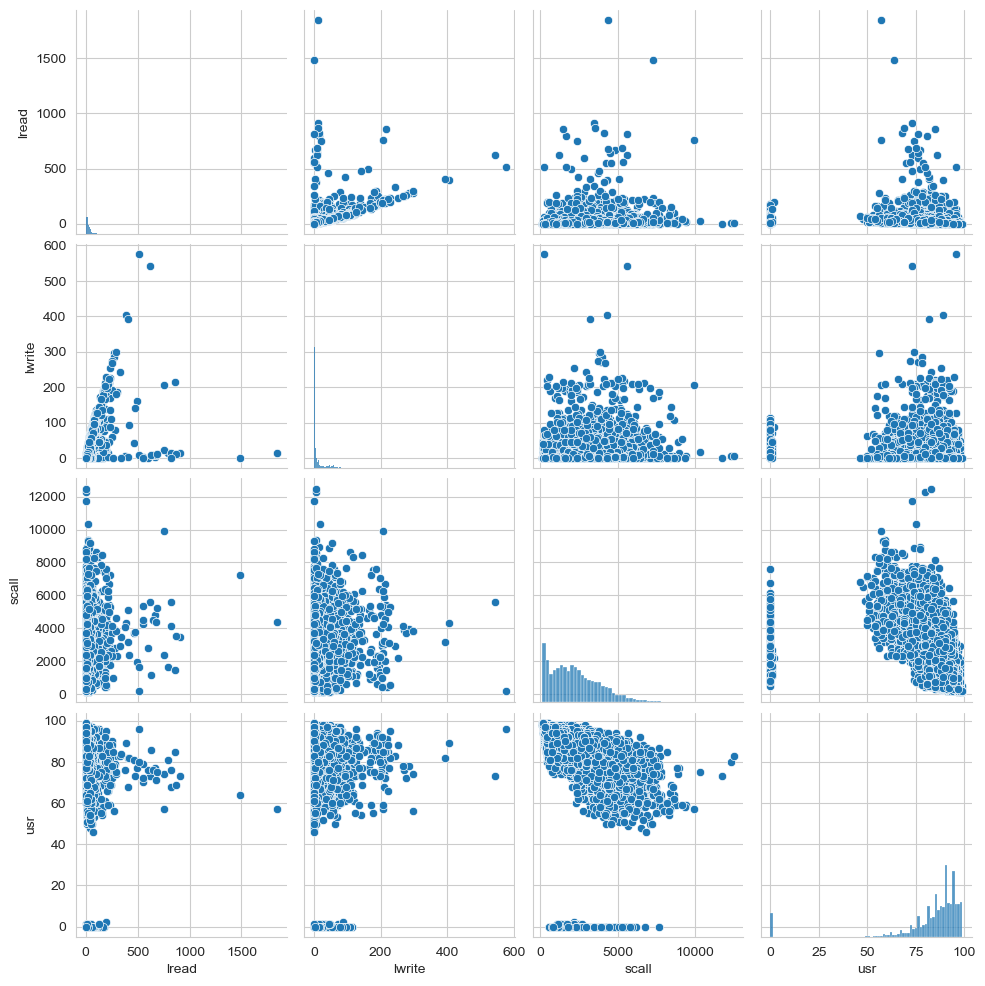

In [396]:
# Create a pair plot using seaborn
sns.pairplot(data)
plt.show()

In [397]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [398]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [400]:
# Subsetting data with selected features and target
X = data[features]
y = data[target]


In [401]:
 #Apply a transformation (e.g., PolynomialFeatures)
poly = PolynomialFeatures(degree=2)  # Example of using a polynomial transformation of degree 2
X_transformed = poly.fit_transform(X)

In [402]:
# Initialize and fit the linear regression model on the transformed data
model = LinearRegression()
model.fit(X_transformed, y)

LinearRegression()

In [403]:
# Predicted values
predicted_values = model.predict(X_transformed)

In [404]:
# Residuals
residuals = y - predicted_values

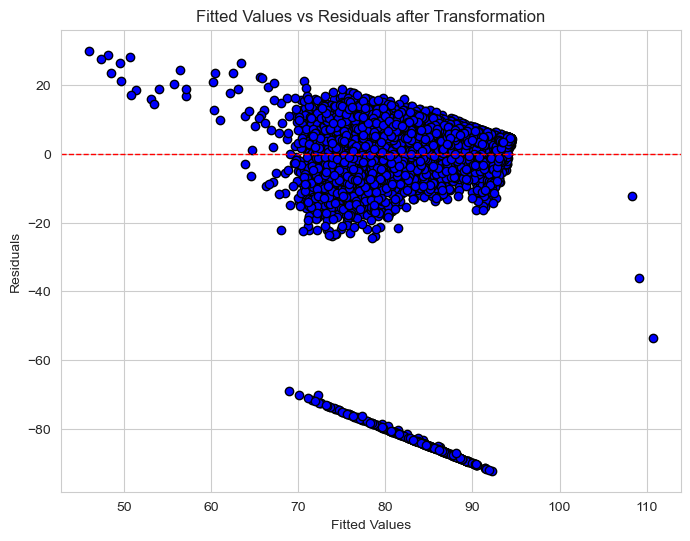

In [405]:
# Create a plot for fitted values against residuals after transformation
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, c='blue', edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Adding a horizontal line at y=0 for reference
plt.title('Fitted Values vs Residuals after Transformation')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [406]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [407]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [409]:
# Subsetting data with selected features and target
X = data[features]
y = data[target]

In [410]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [411]:
# Predicted values
predicted_values = model.predict(X)

In [412]:
# Residuals
residuals = y - predicted_values


In [413]:
# Calculate standard deviation of residuals
std_residuals = np.std(residuals)

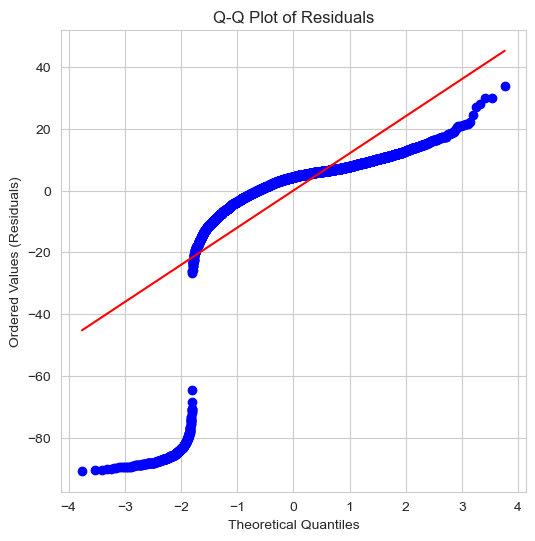

In [414]:
# Create a Q-Q plot to assess normality of residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Residuals)')
plt.show()

In [415]:
import pandas as pd
import statsmodels.api as sm

In [416]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'


In [417]:
# Subsetting data with selected features and target
X = data[features]
y = data[target]

In [418]:
# Add a constant term to the predictor matrix (X) for the intercept
X = sm.add_constant(X)


In [419]:
# Create and fit the linear regression model
model = sm.OLS(y, X).fit()

In [420]:
# Print the summary of the linear regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     343.4
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          4.55e-210
Time:                        19:35:57   Log-Likelihood:                -34997.
No. Observations:                8192   AIC:                         7.000e+04
Df Residuals:                    8188   BIC:                         7.003e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.6219      0.335    276.674      0.0

In [421]:
import pandas as pd
import statsmodels.api as sm

In [422]:
# Choose the features and the target variable
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [424]:
X = data[features]
y = data[target]

In [425]:
X = sm.add_constant(X)

In [426]:
model = sm.OLS(y, X).fit()

In [427]:
predictions = model.predict(X)

In [428]:
model_params = model.params

In [429]:
print("Predictions:")
print(predictions)

Predictions:
0       85.198668
1       92.035939
2       84.770611
3       92.070409
4       91.351435
          ...    
8187    81.649279
8188    87.030095
8189    81.419780
8190    73.147215
8191    89.181427
Length: 8192, dtype: float64


In [430]:
print("\nModel Parameters:")
print(model_params)


Model Parameters:
const     92.621924
lread     -0.022617
lwrite    -0.019904
scall     -0.003447
dtype: float64


In [431]:
import pandas as pd
import statsmodels.api as sm


In [444]:
features = ['lread', 'lwrite', 'scall']  # Example features
target = 'usr'

In [445]:
X = data[features]
y = data[target]


In [436]:
model = sm.OLS(y, X).fit()

In [437]:
model_params = model.params


In [438]:
equation = 'Y = ' + ' + '.join([f'({round(model_params[i], 3)})*{col}' for i, col in enumerate(X.columns)])
print('Equation of the linear regression line:')
print(equation)

Equation of the linear regression line:
Y = (92.622)*const + (-0.023)*lread + (-0.02)*lwrite + (-0.003)*scall


In [448]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [449]:
X = data.drop('usr', axis=1)  # Features
y = data['usr']  # Target variable

In [450]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [451]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X.columns)

In [452]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [453]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [454]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [455]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [456]:
# Print the RMSE and MAE for both train and test data
print(f"RMSE on the train data: {rmse_train:.3f}")
print(f"RMSE on the test data: {rmse_test:.3f}")
print(f"MAE on the train data: {mae_train:.3f}")
print(f"MAE on the test data: {mae_test:.3f}")

RMSE on the train data: 17.278
RMSE on the test data: 17.605
MAE on the train data: 8.555
MAE on the test data: 8.743


In [457]:
import matplotlib.pyplot as plt
import scipy.stats as stats

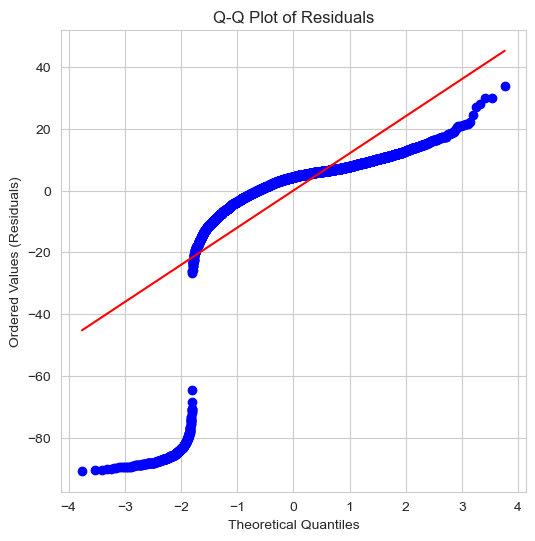

In [458]:
# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values (Residuals)')
plt.show()

In [461]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [462]:
y_pred = model.predict(X_test)


In [463]:
residuals = y_test - y_pred

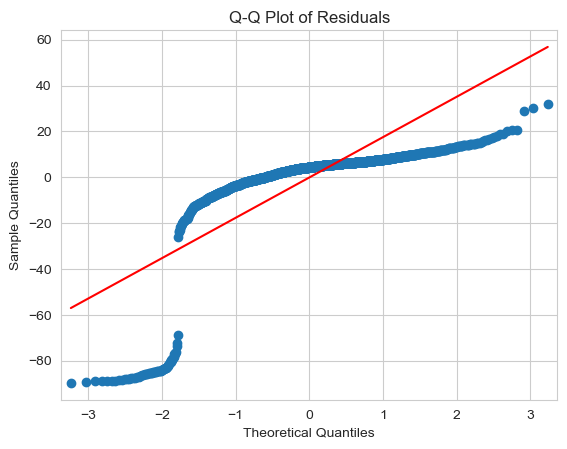

In [464]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')  # 's' indicates a standardized line
plt.title('Q-Q Plot of Residuals')
plt.show()

In [485]:
coef = [0.3, 0.5, -0.1]  # Example coefficients
intercept = 1.5  # Example intercept


In [486]:
feature_names = ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar','pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt','freemem', 'freeswap', 'usr']  # Example feature names

In [487]:
intercept = 1.5  # Example intercept

In [488]:
equation = "feature_names = " + f"{intercept:.3f}"  # Start with the intercept

In [489]:
if len(coef) == len(feature_names):
    for i, feature in enumerate(feature_names):
        equation += f" + {coef[i]:.3f} * {feature}"
else:
    print("Lengths of coef and feature_names do not match.")

Lengths of coef and feature_names do not match.


In [490]:
print("Recommendation:")
print(equation)

Recommendation:
feature_names = 1.500


In [491]:
feature_names = ['lread', 'lwrite', 'scall']  # Example feature names


In [492]:
equation = "usr = " + f"{intercept:.3f}"  # Adding the intercept

In [493]:
for i, feature in enumerate(feature_names):
    equation += f" + {coef[i]:.3f} * {feature}"

print("Recommendation:")
print(equation)

Recommendation:
usr = 1.500 + 0.300 * lread + 0.500 * lwrite + -0.100 * scall


In [494]:
if len(coef) == len(feature_names):
    for i, feature in enumerate(feature_names):
        equation += f" + {coef[i]:.3f} * {feature}"
else:
    print("Lengths of coef and feature_names do not match.")

print("Recommendation:")
print(equation)

Recommendation:
usr = 1.500 + 0.300 * lread + 0.500 * lwrite + -0.100 * scall + 0.300 * lread + 0.500 * lwrite + -0.100 * scall


### Problem 2

In [495]:
import pandas as pd

In [500]:
data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [501]:
top_5 = data.head()
print(top_5)

   Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed       

In [502]:
print("Variable Types:")
print(data.dtypes)

Variable Types:
Wife_age                     float64
Wife_ education               object
Husband_education             object
No_of_children_born          float64
Wife_religion                 object
Wife_Working                  object
Husband_Occupation             int64
Standard_of_living_index      object
Media_exposure                object
Contraceptive_method_used     object
dtype: object


In [503]:
print("\nNull Values:")
print(data.isnull().sum())


Null Values:
Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [504]:
summary = data.describe()
print("Five-Number Summary:")
print(summary)

Five-Number Summary:
          Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000


In [509]:
# Select numerical columns for which you want to compute the five-number summary
numerical_columns = ['Wife\'s age', 'Number of children ever born']  # Adjust column names as needed


In [516]:
# Get the numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [517]:
# Display the numerical columns
print(numerical_columns)

Index(['Wife_age', 'No_of_children_born', 'Husband_Occupation'], dtype='object')


In [518]:
# Calculate the five-number summary for selected columns
five_num_summary = data[numerical_columns].describe(percentiles=[.25, .5, .75])
print("Five-Number Summary:")
print(five_num_summary)

Five-Number Summary:
          Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000


In [519]:
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

Null Values:
Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [520]:
print("Null Values Before Treatment:")
print(data.isnull().sum())

Null Values Before Treatment:
Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [523]:
# Display the numerical columns
print(numerical_columns)

["Wife's age", 'Number of children ever born']


In [524]:
# Impute null values in numerical columns with the mean
numerical_columns = ['Wife\'s age', 'Number of children ever born']  # Adjust column names
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


KeyError: "None of [Index(['Wife's age', 'Number of children ever born'], dtype='object')] are in the [columns]"

In [525]:
# Check for null values after treatment
print("\nNull Values After Treatment:")
print(data.isnull().sum())


Null Values After Treatment:
Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64


In [526]:
duplicate_rows = data[data.duplicated()]

In [527]:
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)

Duplicate rows found:
      Wife_age Wife_ education Husband_education  No_of_children_born  \
79        38.0        Tertiary          Tertiary                  1.0   
167       26.0        Tertiary          Tertiary                  1.0   
224       47.0        Tertiary          Tertiary                  4.0   
270       30.0        Tertiary          Tertiary                  2.0   
299       26.0        Tertiary          Tertiary                  1.0   
...        ...             ...               ...                  ...   
1367      44.0        Tertiary          Tertiary                  5.0   
1387       NaN       Secondary          Tertiary                  2.0   
1423       NaN        Tertiary          Tertiary                  2.0   
1440       NaN        Tertiary          Tertiary                  1.0   
1447       NaN        Tertiary          Tertiary                  2.0   

        Wife_religion Wife_Working  Husband_Occupation  \
79        Scientology          Yes         

In [528]:
object_columns = data.select_dtypes(include='object').columns
unique_value_counts = {col: data[col].nunique() for col in object_columns}


In [529]:
print("Unique Value Counts for Object-Type Columns:")
for col, count in unique_value_counts.items():
    print(f"{col}: {count}")

Unique Value Counts for Object-Type Columns:
Wife_ education: 4
Husband_education: 4
Wife_religion: 2
Wife_Working: 2
Standard_of_living_index: 4
Media_exposure : 2
Contraceptive_method_used: 2


In [530]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


In [531]:
# Calculate the IQR for each column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [532]:
# Define a threshold for outliers (e.g., 1.5 times IQR)
outlier_threshold = 1.5


In [533]:
# Find outliers for each numerical column
outliers = ((data[numerical_columns] < (Q1 - outlier_threshold * IQR)) | (data[numerical_columns] > (Q3 + outlier_threshold * IQR))).any()
outliers = outliers[outliers]

In [534]:
print("Potential Outliers:")
print(outliers)

Potential Outliers:
No_of_children_born    True
dtype: bool


In [535]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

In [536]:
# Calculate the IQR for each column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [537]:
# Define a threshold for outliers (e.g., 1.5 times IQR)
outlier_threshold = 1.5


In [538]:
# Cap the outliers for each numerical column
for col in numerical_columns:
    lower_bound = Q1[col] - outlier_threshold * IQR[col]
    upper_bound = Q3[col] + outlier_threshold * IQR[col]
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


In [539]:
# Post-treatment check for outliers
outliers_post_treatment = ((data[numerical_columns] < (Q1 - outlier_threshold * IQR)) | (data[numerical_columns] > (Q3 + outlier_threshold * IQR))).any()
outliers_post_treatment = outliers_post_treatment[outliers_post_treatment]


In [540]:
print("Potential Outliers after Treatment:")
print(outliers_post_treatment)

Potential Outliers after Treatment:
Series([], dtype: bool)


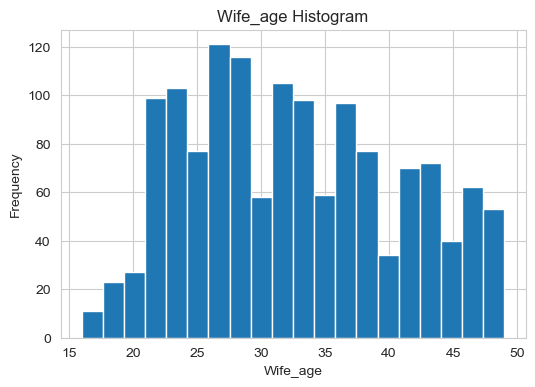

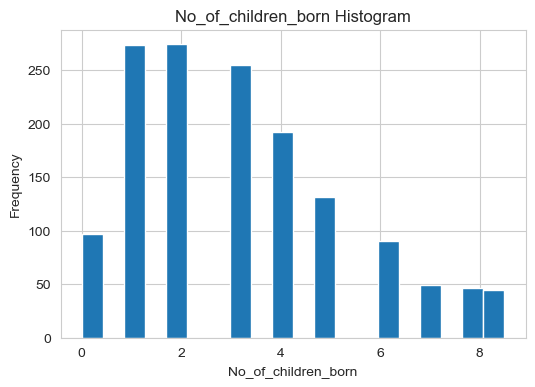

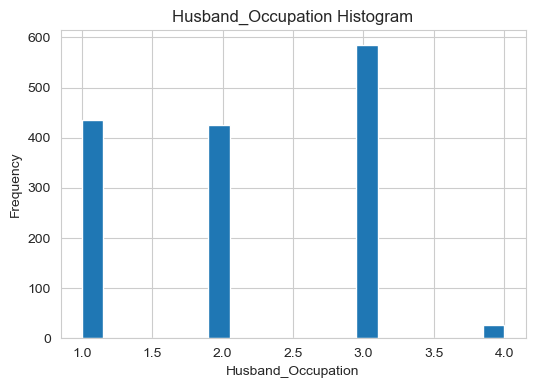

In [541]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    data[col].plot(kind='hist', bins=20)
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

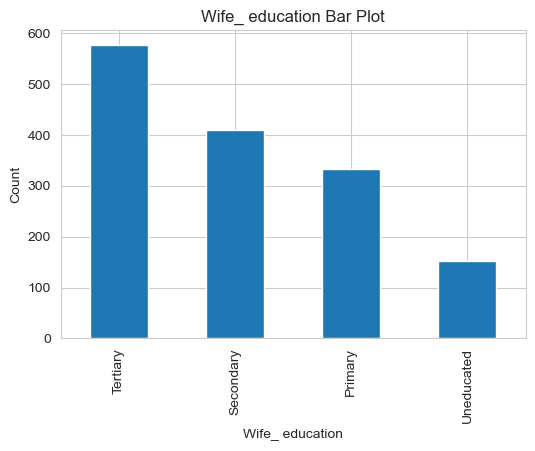

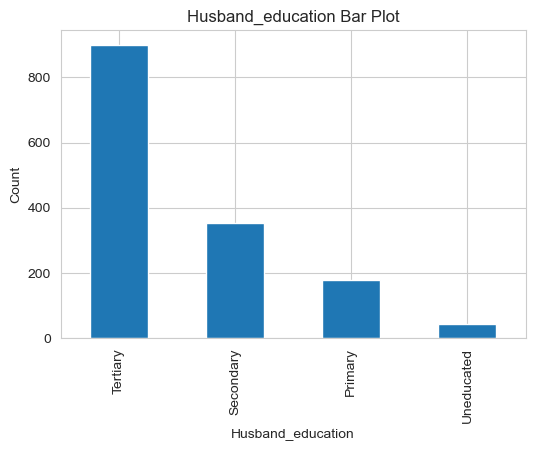

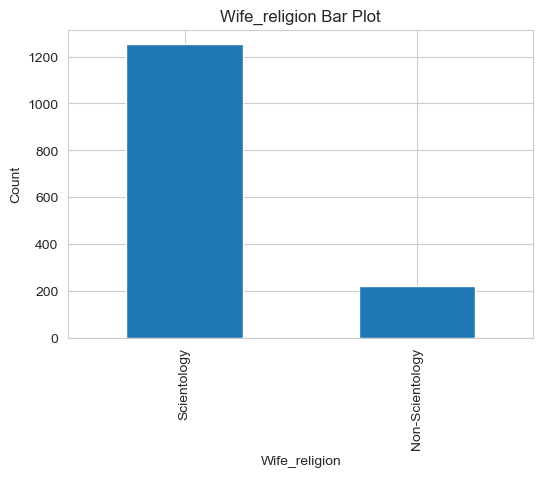

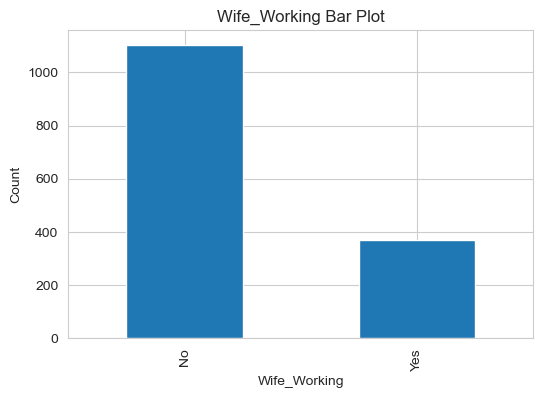

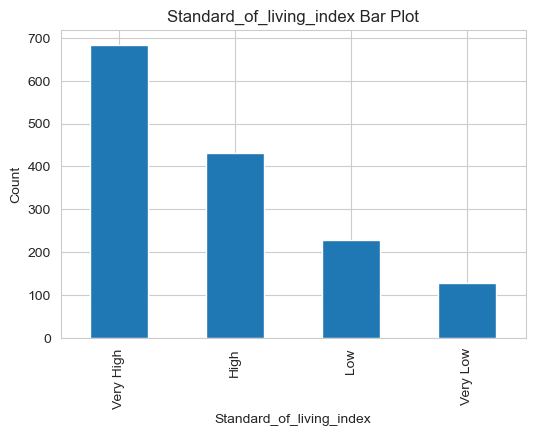

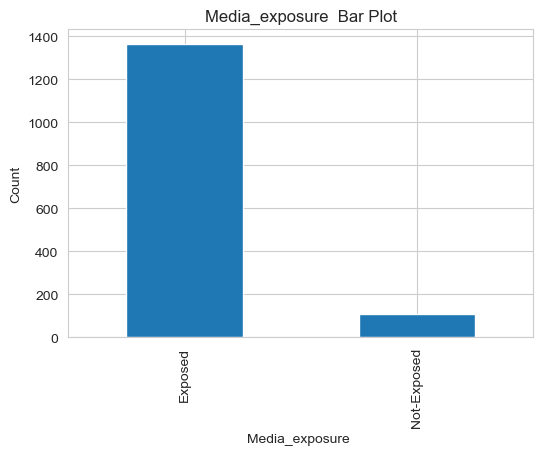

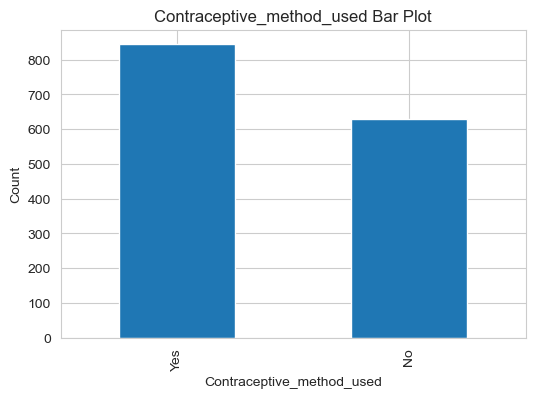

In [542]:
# Univariate analysis for categorical columns
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Bar Plot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

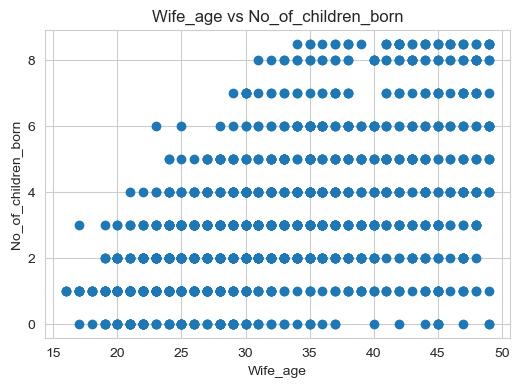

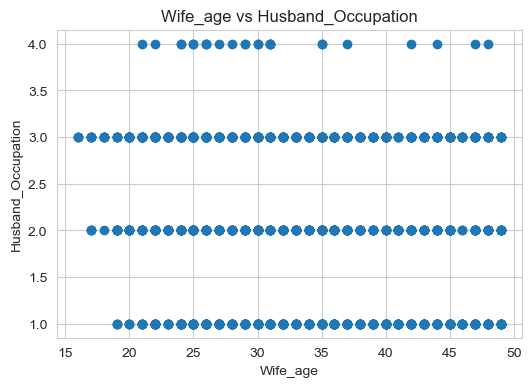

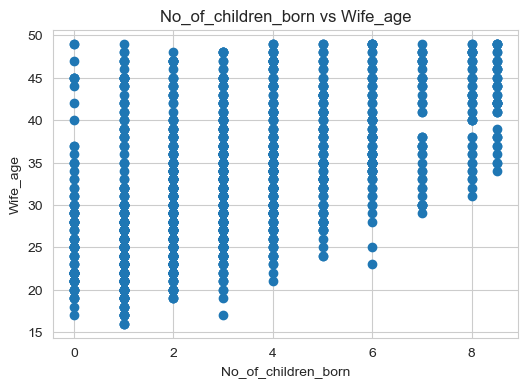

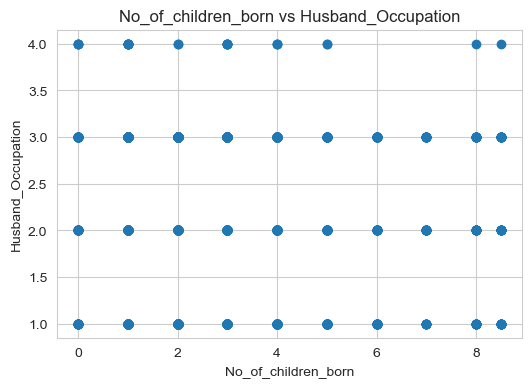

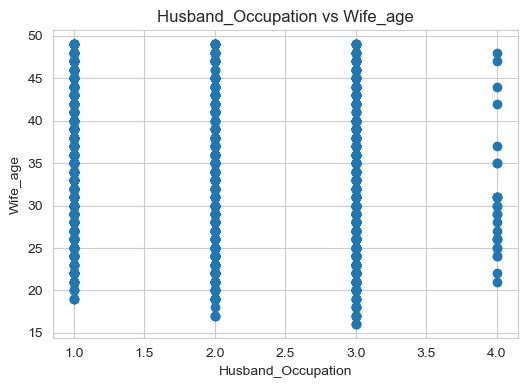

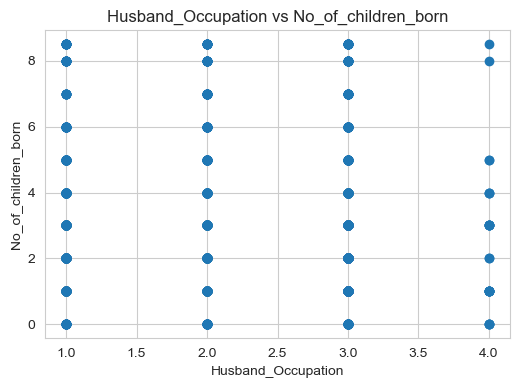

In [543]:
# Bivariate analysis for numerical variables (scatter plots)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    for other_col in numerical_columns:
        if col != other_col:
            plt.figure(figsize=(6, 4))
            plt.scatter(data[col], data[other_col])
            plt.title(f'{col} vs {other_col}')
            plt.xlabel(col)
            plt.ylabel(other_col)
            plt.show()

<Figure size 600x400 with 0 Axes>

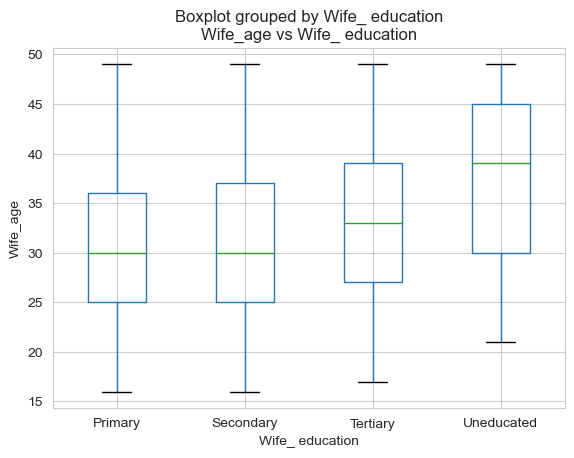

<Figure size 600x400 with 0 Axes>

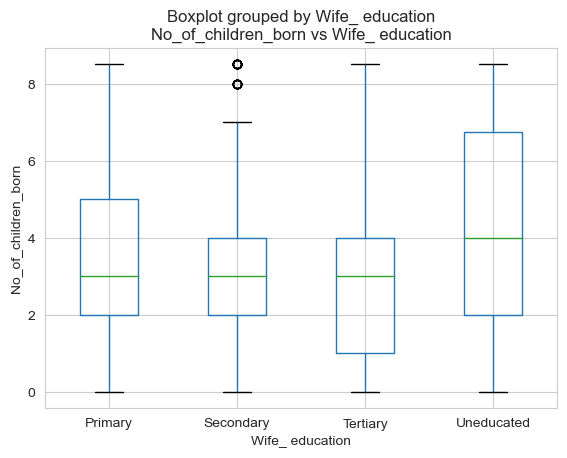

<Figure size 600x400 with 0 Axes>

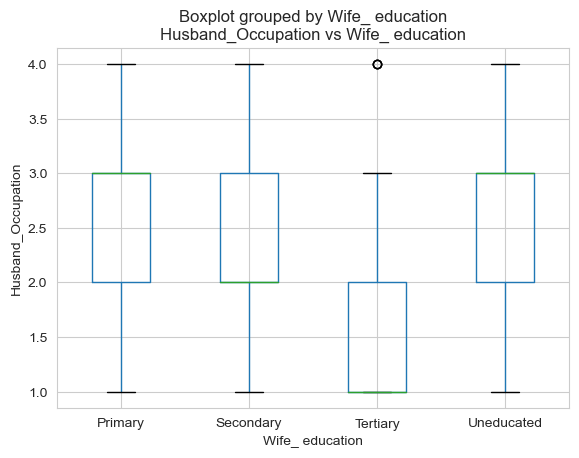

<Figure size 600x400 with 0 Axes>

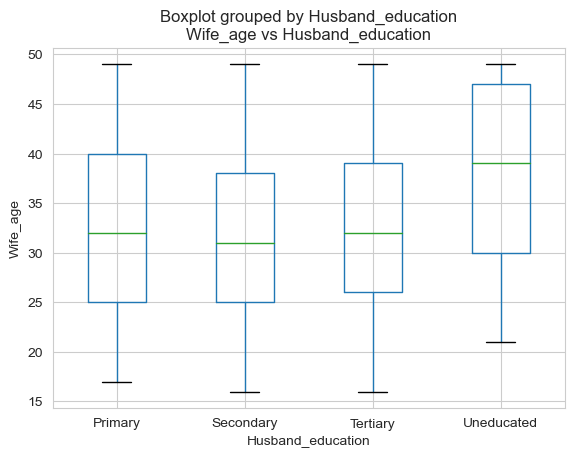

<Figure size 600x400 with 0 Axes>

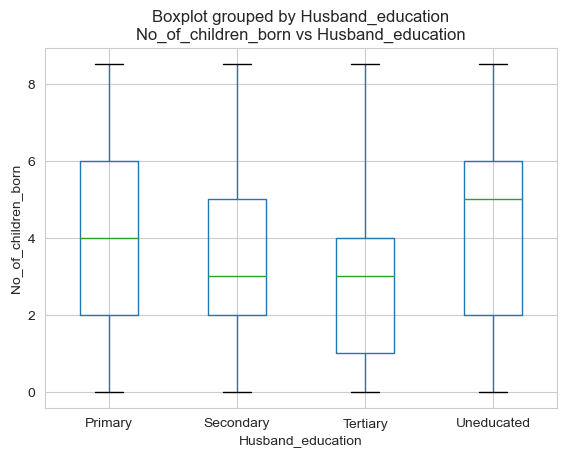

<Figure size 600x400 with 0 Axes>

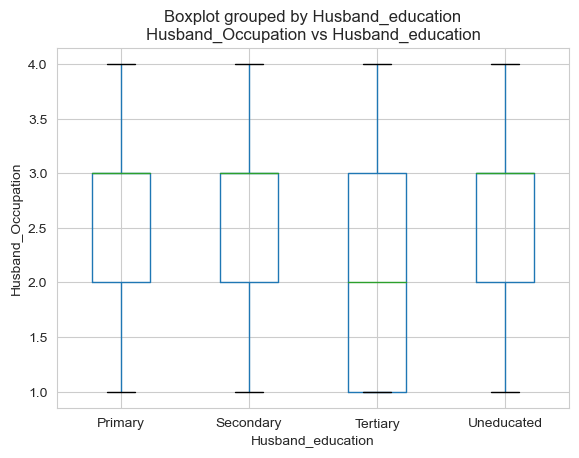

<Figure size 600x400 with 0 Axes>

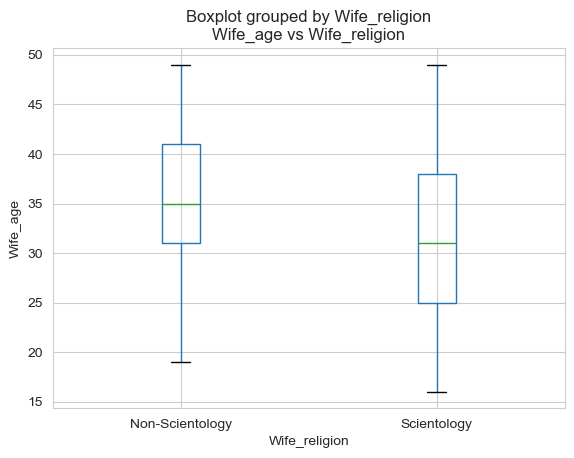

<Figure size 600x400 with 0 Axes>

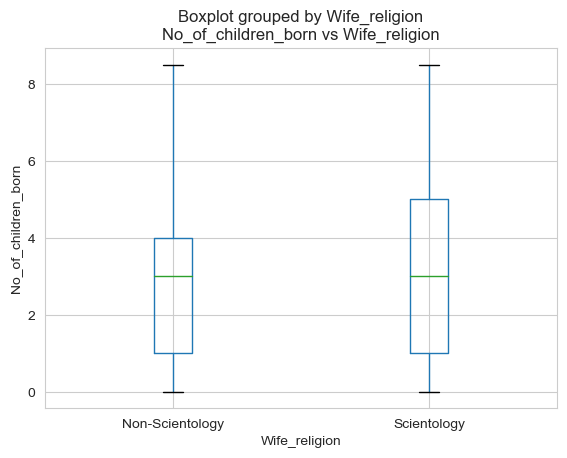

<Figure size 600x400 with 0 Axes>

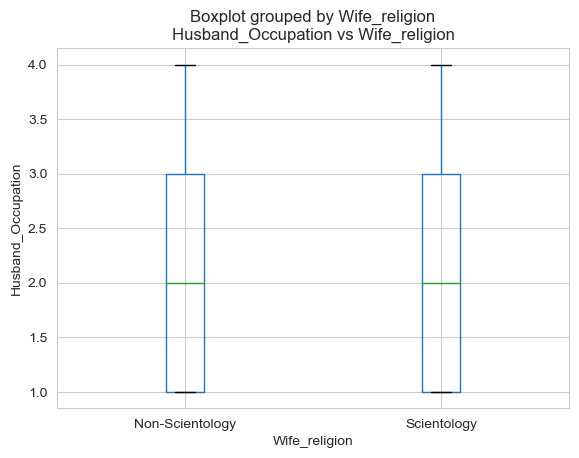

<Figure size 600x400 with 0 Axes>

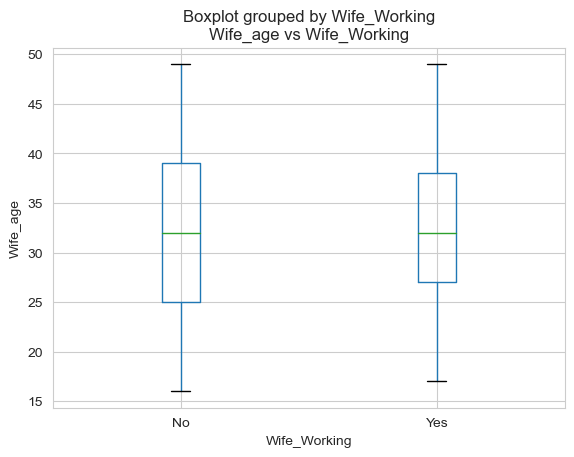

<Figure size 600x400 with 0 Axes>

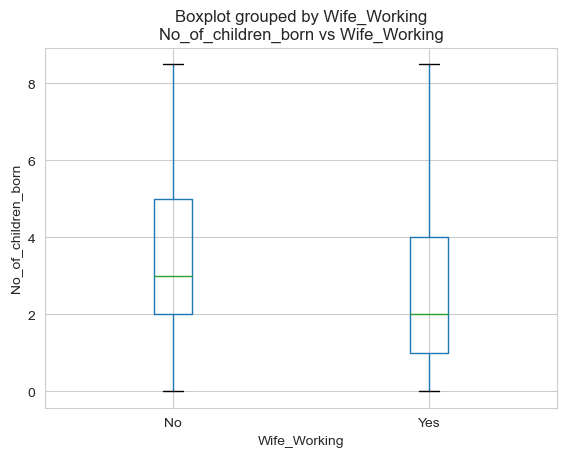

<Figure size 600x400 with 0 Axes>

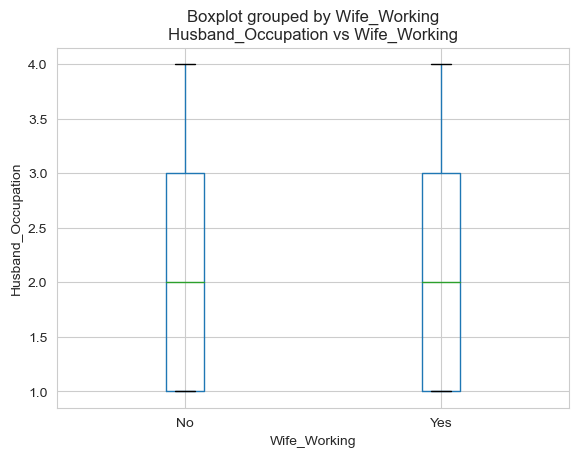

<Figure size 600x400 with 0 Axes>

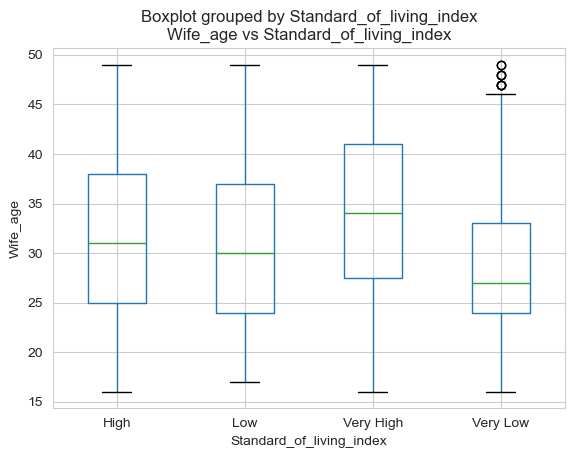

<Figure size 600x400 with 0 Axes>

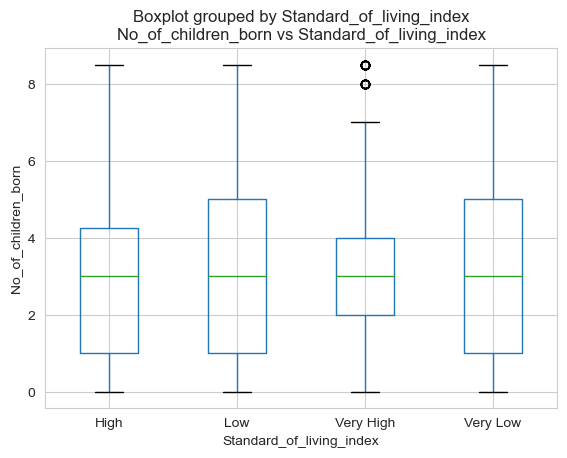

<Figure size 600x400 with 0 Axes>

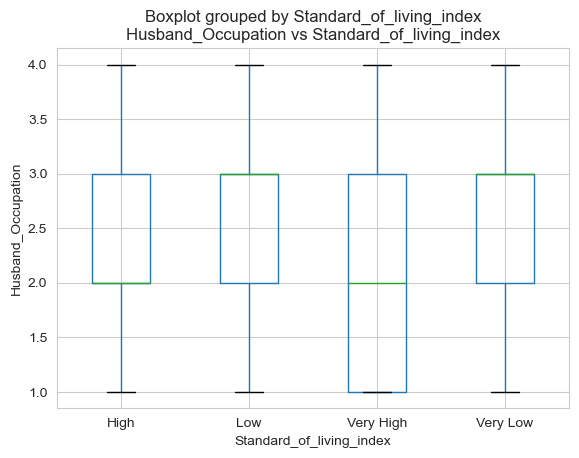

<Figure size 600x400 with 0 Axes>

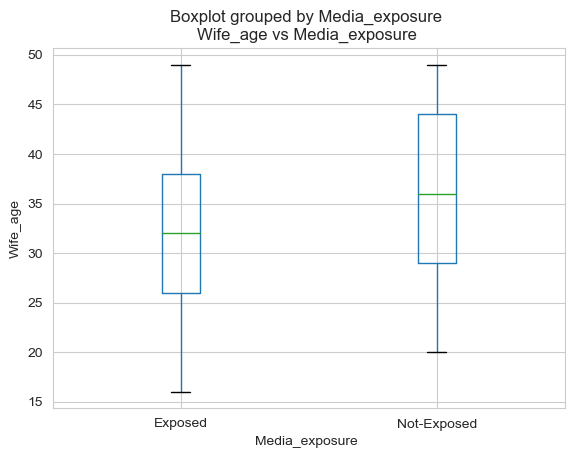

<Figure size 600x400 with 0 Axes>

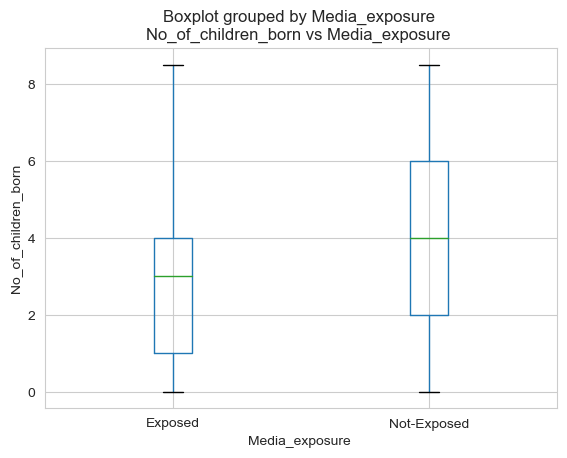

<Figure size 600x400 with 0 Axes>

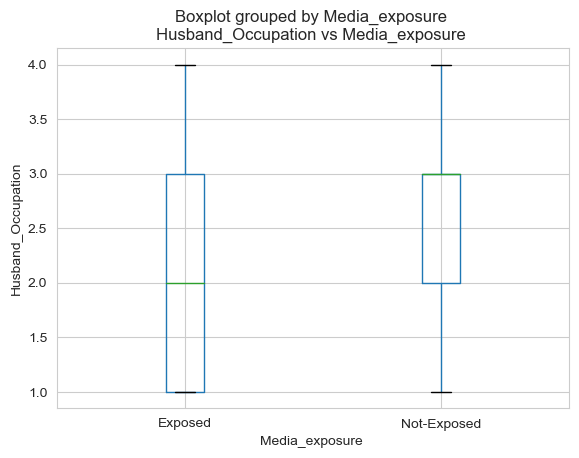

<Figure size 600x400 with 0 Axes>

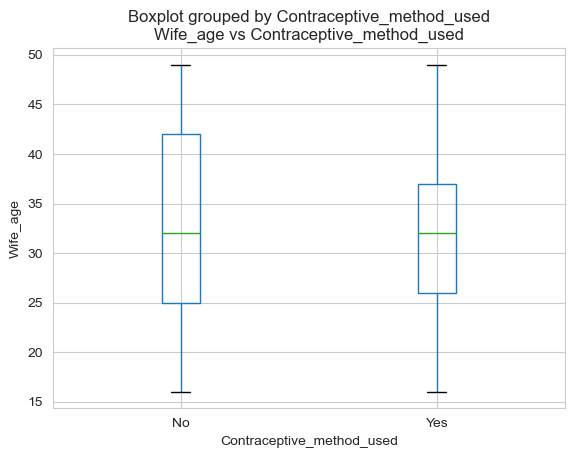

<Figure size 600x400 with 0 Axes>

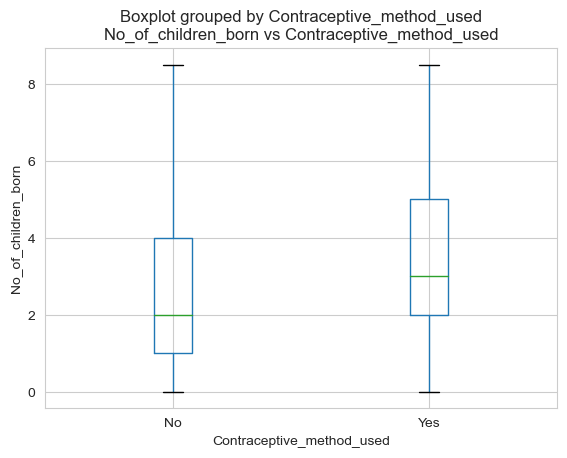

<Figure size 600x400 with 0 Axes>

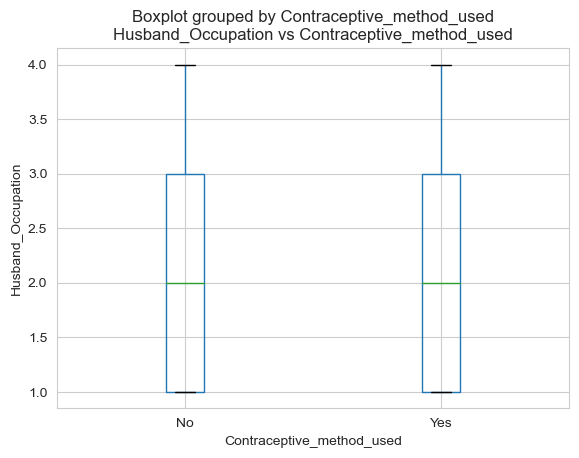

In [544]:
# Bivariate analysis for a numerical variable against a categorical variable (box plots)
categorical_columns = data.select_dtypes(include='object').columns

for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(6, 4))
        data.boxplot(column=num_col, by=cat_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

In [553]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [554]:
# Load the dataset
data = pd.read_excel('Contraceptive_method_dataset.xlsx')


In [555]:
# Select numerical columns for the pair plot
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

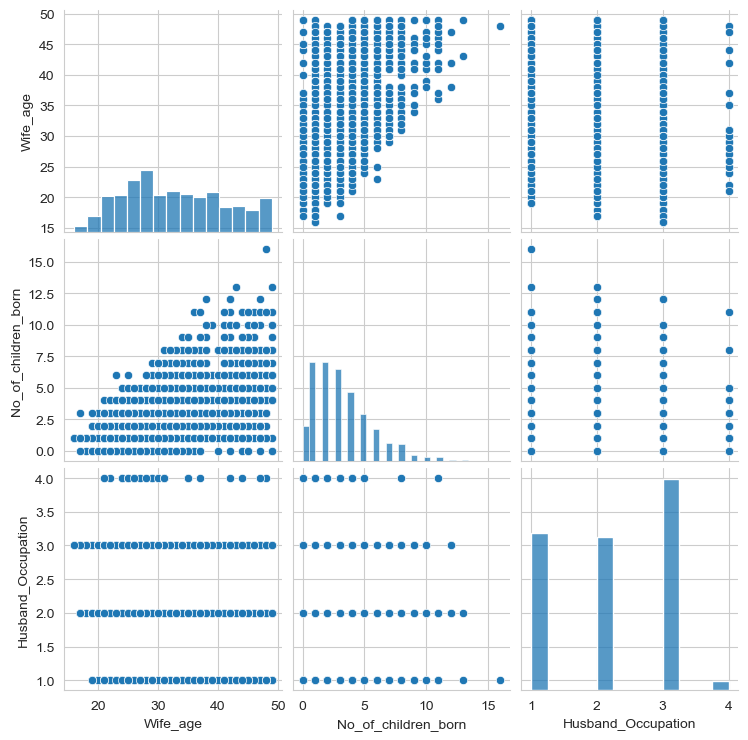

In [556]:
# Pair plot for numerical columns
sns.pairplot(data[numerical_columns])
plt.show()

In [557]:
# Calculate the correlation matrix
correlation_matrix = data.corr()


C:\Users\HP\AppData\Local\Temp\ipykernel_27724\1112289949.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


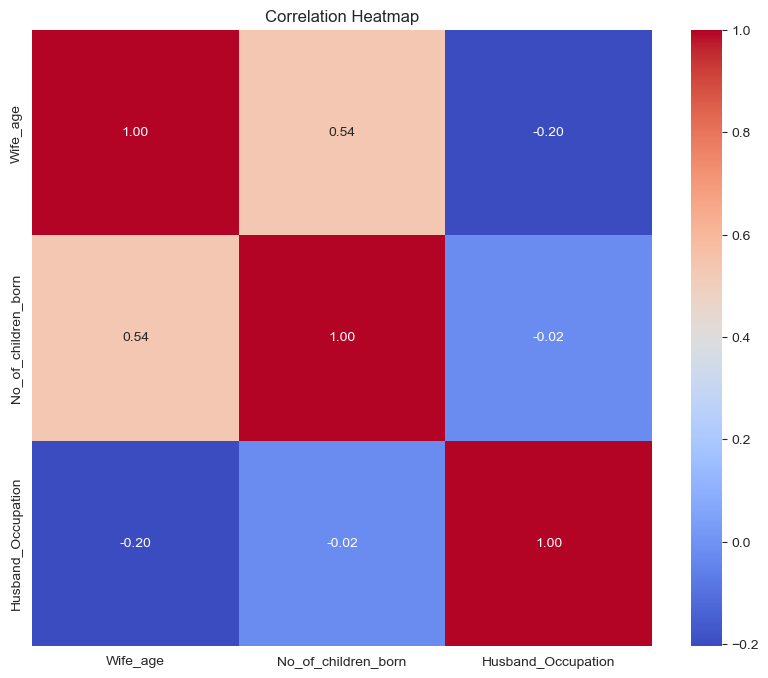

In [558]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [559]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [560]:
# Load the dataset
data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [561]:
# Before Encoding
print("Before Encoding:")
print(data.head())


Before Encoding:
   Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1      

In [562]:
# Select categorical columns for encoding
categorical_columns = data.select_dtypes(include='object').columns

In [563]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [564]:
# Encode categorical columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [565]:
# After Encoding
print("\nAfter Encoding:")
print(data.head())


After Encoding:
   Wife_age  Wife_ education  Husband_education  No_of_children_born  \
0      24.0                0                  1                  3.0   
1      45.0                3                  1                 10.0   
2      43.0                0                  1                  7.0   
3      42.0                1                  0                  9.0   
4      36.0                1                  1                  8.0   

   Wife_religion  Wife_Working  Husband_Occupation  Standard_of_living_index  \
0              1             0                   2                         0   
1              1             0                   3                         2   
2              1             0                   3                         2   
3              1             0                   3                         0   
4              1             0                   3                         1   

   Media_exposure   Contraceptive_method_used  
0                0   

In [569]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [570]:
# Load the dataset
data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [572]:
# Display column names
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [575]:
# Display unique values in each column
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())

Unique values in Wife_age:
[24. 45. 43. 42. 36. 19. 38. 21. 27. 44. 26. 48. 39. 37. 46. 40. 29. 31.
 33. 25. 28. 47. 32. 49. 34. 20. 22. 30. 23. 35. 41. 17. 18. 16. nan]
Unique values in Wife_ education:
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
Unique values in Husband_education:
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
Unique values in No_of_children_born:
[ 3. 10.  7.  9.  8.  0.  6.  1.  2.  4.  5. 12. 11. 13. 16. nan]
Unique values in Wife_religion:
['Scientology' 'Non-Scientology']
Unique values in Wife_Working:
['No' 'Yes']
Unique values in Husband_Occupation:
[2 3 1 4]
Unique values in Standard_of_living_index:
['High' 'Very High' 'Low' 'Very Low']
Unique values in Media_exposure :
['Exposed' 'Not-Exposed']
Unique values in Contraceptive_method_used:
['No' 'Yes']


In [576]:
# Display column names
print("Column names in the dataset:")
print(data.columns)

Column names in the dataset:
Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [577]:
# Display unique values in each column
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())

Unique values in Wife_age:
[24. 45. 43. 42. 36. 19. 38. 21. 27. 44. 26. 48. 39. 37. 46. 40. 29. 31.
 33. 25. 28. 47. 32. 49. 34. 20. 22. 30. 23. 35. 41. 17. 18. 16. nan]
Unique values in Wife_ education:
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
Unique values in Husband_education:
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
Unique values in No_of_children_born:
[ 3. 10.  7.  9.  8.  0.  6.  1.  2.  4.  5. 12. 11. 13. 16. nan]
Unique values in Wife_religion:
['Scientology' 'Non-Scientology']
Unique values in Wife_Working:
['No' 'Yes']
Unique values in Husband_Occupation:
[2 3 1 4]
Unique values in Standard_of_living_index:
['High' 'Very High' 'Low' 'Very Low']
Unique values in Media_exposure :
['Exposed' 'Not-Exposed']
Unique values in Contraceptive_method_used:
['No' 'Yes']


In [579]:
# Display column names
print("Column names in the dataset:")
print(data.columns)


Column names in the dataset:
Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [580]:
# Display unique values in each column
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())


Unique values in Wife_age:
[24. 45. 43. 42. 36. 19. 38. 21. 27. 44. 26. 48. 39. 37. 46. 40. 29. 31.
 33. 25. 28. 47. 32. 49. 34. 20. 22. 30. 23. 35. 41. 17. 18. 16. nan]
Unique values in Wife_ education:
['Primary' 'Uneducated' 'Secondary' 'Tertiary']
Unique values in Husband_education:
['Secondary' 'Primary' 'Tertiary' 'Uneducated']
Unique values in No_of_children_born:
[ 3. 10.  7.  9.  8.  0.  6.  1.  2.  4.  5. 12. 11. 13. 16. nan]
Unique values in Wife_religion:
['Scientology' 'Non-Scientology']
Unique values in Wife_Working:
['No' 'Yes']
Unique values in Husband_Occupation:
[2 3 1 4]
Unique values in Standard_of_living_index:
['High' 'Very High' 'Low' 'Very Low']
Unique values in Media_exposure :
['Exposed' 'Not-Exposed']
Unique values in Contraceptive_method_used:
['No' 'Yes']


In [581]:
# Replace the column names according to the dataset
X = data.drop('Contraceptive_method_used', axis=1)  # Features
y = data['Contraceptive_method_used']  # Target variable


In [582]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [583]:
# Check the shape of the training and testing sets
print("Training set shape (X_train):", X_train.shape, "Testing set shape (X_test):", X_test.shape)

Training set shape (X_train): (1178, 9) Testing set shape (X_test): (295, 9)


In [584]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [585]:
# Load the dataset
data = pd.read_excel('Contraceptive_method_dataset.xlsx')


In [586]:
# Assuming 'target_column' is the column to predict and 'X' contains the features
X = data.drop('Contraceptive_method_used', axis=1)  # Features
y = data['Contraceptive_method_used']  # Target variable


In [587]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [589]:
# Assuming 'target_column' is the column to predict and 'X' contains the features
categorical_columns = ['Wife_education', 'Husband_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure']
X = data.drop('Contraceptive_method_used', axis=1)  # Features
y = data['Contraceptive_method_used']  # Target variable


In [593]:
print(data.columns)

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [594]:
# Define the categorical columns
categorical_columns = ['Wife_ education', 'Media_exposure ']

In [595]:
# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=categorical_columns)


In [628]:
# Verify the updated dataset
print(data.head())

   Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed       

In [629]:
from sklearn.model_selection import train_test_split


In [630]:
# Assuming 'target_column' is the column to predict and 'X' contains the features
X = data.drop('Contraceptive_method_used', axis=1)  # Features
y = data['Contraceptive_method_used']  # Target variable


In [631]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [633]:
# Identify categorical columns
categorical_columns = ['Wife_education', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Media_exposure']


In [635]:
print(data.columns)

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')


In [636]:
# Select the features and the target variable
X = data[['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ']]
y = data['Contraceptive_method_used']  # Assuming 'Contraceptive_method_used' is the target variable

In [637]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [638]:
# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1178, 9)
X_test shape: (295, 9)


In [640]:
categorical_columns = ['Wife_education', 'Wife_religion', 'Media_exposure']

In [642]:
# Check if the specified columns exist in the dataset
for column in categorical_columns:
    if column not in data.columns:
        print(f"Column '{column}' not found in the dataset.")

Column 'Wife_education' not found in the dataset.
Column 'Media_exposure' not found in the dataset.


In [643]:
# Assuming these are the columns in your dataset
data.columns = ['Wife_age', 'Education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_Exposure', 'Contraceptive_method_used']

In [644]:
# Columns that seem categorical or non-numeric
categorical_columns = ['Education', 'Media_Exposure']

In [646]:
data = pd.get_dummies(data, columns=categorical_columns)

In [650]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [651]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [653]:

data = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [654]:
# Select the features and the target variable
X = data[['Wife_age', 'Wife_ education', 'Husband_education', 'No_of_children_born', 'Wife_religion', 'Wife_Working', 'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ']]

In [660]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [662]:
categorical_columns = ['Wife_education', 'Media_exposure']

In [665]:
# Define features and target variable
feature_columns = [
    'Wife_age', 'Husband_education', 
    'No_of_children_born', 'Wife_religion', 'Wife_Working', 
    'Husband_Occupation', 'Standard_of_living_index', 
]
X = data[feature_columns]
y = data['Contraceptive_method_used']


In [666]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [668]:
from sklearn.preprocessing import LabelEncoder

In [669]:
# Define the categorical columns
categorical_columns = ['Wife_education', 'Media_exposure']

In [673]:
feature_columns = [
    'Wife_age', 'Husband_education', 
    'No_of_children_born', 'Wife_religion', 'Wife_Working', 
    'Husband_Occupation', 'Standard_of_living_index',
]
X = data[feature_columns]
y = data['Contraceptive_method_used']

In [674]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
